In [26]:
import numpy as np #for linear algebra
import pandas as pd #for data processing

import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [27]:
directory = 'path/to/Code BA/'

for dirname, _, filenames in os.walk(directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/Niklas/Downloads/Code BA/Comparing_Gradient_Boosting_and_Support_Vector_Machines_in_Football_Outcome_Prediction.ipynb
C:/Users/Niklas/Downloads/Code BA/fifa_ranking-2023-07-20.csv
C:/Users/Niklas/Downloads/Code BA/results.csv


In [28]:

filepath_results = './results.csv'
df = pd.read_csv(filepath_results)
df["date"] = pd.to_datetime(df["date"])
df = df[(df["date"] >= "2016-07-12") & (df["date"] < "2021-07-12")].reset_index(drop=True)
df.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
4258,2021-07-11,Namibia,Zimbabwe,2,0,COSAFA Cup,Port Elizabeth,South Africa,True
4259,2021-07-11,Mozambique,Malawi,2,0,COSAFA Cup,Port Elizabeth,South Africa,True
4260,2021-07-11,El Salvador,Guatemala,2,0,Gold Cup,Frisco,United States,True
4261,2021-07-11,Canada,Martinique,4,1,Gold Cup,Kansas City,United States,True
4262,2021-07-11,United States,Haiti,1,0,Gold Cup,Kansas City,United States,False


In [29]:
df.shape

(4263, 9)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4263 entries, 0 to 4262
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        4263 non-null   datetime64[ns]
 1   home_team   4263 non-null   object        
 2   away_team   4263 non-null   object        
 3   home_score  4263 non-null   int64         
 4   away_score  4263 non-null   int64         
 5   tournament  4263 non-null   object        
 6   city        4263 non-null   object        
 7   country     4263 non-null   object        
 8   neutral     4263 non-null   bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 270.7+ KB


In [31]:
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [32]:
filepath_fifa_ranking = './fifa_ranking-2023-07-20.csv'
fifa_ranking = pd.read_csv(filepath_fifa_ranking)
fifa_ranking["rank_date"] = pd.to_datetime(fifa_ranking["rank_date"])
fifa_ranking = fifa_ranking[(fifa_ranking["rank_date"] >= "2016-07-12") & (fifa_ranking["rank_date"] < "2021-07-12")].reset_index(drop=True)
fifa_ranking.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
10168,146,Lesotho,LES,1069.91,1069.91,0,CAF,2021-05-27
10169,147,Nicaragua,NCA,1060.51,1060.51,0,CONCACAF,2021-05-27
10170,148,Kuwait,KUW,1056.30,1056.30,0,AFC,2021-05-27
10171,149,Afghanistan,AFG,1052.24,1052.24,0,AFC,2021-05-27
10172,145,Yemen,YEM,1070.54,1070.54,0,AFC,2021-05-27


In [33]:
fifa_ranking.dtypes

rank                        int64
country_full               object
country_abrv               object
total_points              float64
previous_points           float64
rank_change                 int64
confederation              object
rank_date          datetime64[ns]
dtype: object

In [34]:
fifa_ranking = fifa_ranking.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()
fifa_ranking.tail()

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
370518,2021-05-23,107.0,Zimbabwe,ZIM,1175.5,1176.0,-5.0,CAF
370519,2021-05-24,107.0,Zimbabwe,ZIM,1175.5,1176.0,-5.0,CAF
370520,2021-05-25,107.0,Zimbabwe,ZIM,1175.5,1176.0,-5.0,CAF
370521,2021-05-26,107.0,Zimbabwe,ZIM,1175.5,1176.0,-5.0,CAF
370522,2021-05-27,107.0,Zimbabwe,ZIM,1175.5,1175.5,0.0,CAF


In [35]:
new_date_range = pd.date_range(start=fifa_ranking['rank_date'].max(), end='2021-06-11', freq='D')
extended_rankings = pd.DataFrame(new_date_range, columns=['rank_date'])
fifa_ranking = pd.concat([fifa_ranking, extended_rankings], ignore_index=True).ffill()
fifa_ranking.tail()

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
370534,2021-06-07,107.0,Zimbabwe,ZIM,1175.5,1175.5,0.0,CAF
370535,2021-06-08,107.0,Zimbabwe,ZIM,1175.5,1175.5,0.0,CAF
370536,2021-06-09,107.0,Zimbabwe,ZIM,1175.5,1175.5,0.0,CAF
370537,2021-06-10,107.0,Zimbabwe,ZIM,1175.5,1175.5,0.0,CAF
370538,2021-06-11,107.0,Zimbabwe,ZIM,1175.5,1175.5,0.0,CAF


In [36]:
print(sorted(df['home_team'].unique()))
print(sorted(df['away_team'].unique()))
print(sorted(fifa_ranking['country_full'].unique()))

['Abkhazia', 'Afghanistan', 'Albania', 'Alderney', 'Algeria', 'American Samoa', 'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Artsakh', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barawa', 'Barbados', 'Basque Country', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cascadia', 'Catalonia', 'Cayman Islands', 'Central African Republic', 'Chad', 'Chagos Islands', 'Chameria', 'Chile', 'China PR', 'Colombia', 'Comoros', 'Congo', 'Corsica', 'Costa Rica', 'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czech Republic', 'DR Congo', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Ellan Vannin', 'England', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Falklan

In [37]:
country_name_mapping = {
    'USA': 'United States',
    'Korea Republic': 'South Korea',
    'IR Iran': 'Iran',
    'China PR': 'China',
    'FYR Macedonia': 'North Macedonia',
    'Congo DR': 'DR Congo',
}

In [38]:
df['home_team'] = df['home_team'].replace(country_name_mapping)
df['away_team'] = df['away_team'].replace(country_name_mapping)
fifa_ranking['country_full'] = fifa_ranking['country_full'].replace(country_name_mapping)

In [39]:
print(df.dtypes)
print(fifa_ranking.dtypes)

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object
rank_date          datetime64[ns]
rank                      float64
country_full               object
country_abrv               object
total_points              float64
previous_points           float64
rank_change               float64
confederation              object
dtype: object


In [40]:
# Example: Check if France has a FIFA ranking on 2016-07-03
print(fifa_ranking[(fifa_ranking['country_full'] == 'France') & (fifa_ranking['rank_date'] <= '2016-07-03')].tail())

Empty DataFrame
Columns: [rank_date, rank, country_full, country_abrv, total_points, previous_points, rank_change, confederation]
Index: []


In [41]:
# Check if all teams in the matches are present in the FIFA rankings
unique_teams = pd.concat([df['home_team'], df['away_team']]).unique()
fifa_teams = fifa_ranking['country_full'].unique()

non_matching_teams = [team for team in unique_teams if team not in fifa_teams]
print("Non-matching teams:", non_matching_teams)

Non-matching teams: ['North Korea', 'Barawa', 'Chagos Islands', 'Kyrgyzstan', 'Saint Vincent and the Grenadines', 'Cape Verde', 'Ivory Coast', 'French Guiana', 'Taiwan', 'Brunei', 'Saint Kitts and Nevis', 'Catalonia', 'Basque Country', 'Martinique', 'Vatican City', 'Guadeloupe', 'Corsica', 'Northern Cyprus', 'Abkhazia', 'Padania', 'Felvidék', 'Kárpátalja', 'Székely Land', 'Ellan Vannin', 'South Ossetia', 'Menorca', 'Alderney', 'Gotland', 'Western Isles', 'Guernsey', 'Saare County', 'Isle of Man', 'Ynys Môn', 'Jersey', 'Orkney', 'Frøya', 'Shetland', 'Åland Islands', 'Falkland Islands', 'Hitra', 'Saint Lucia', 'Greenland', 'Tuvalu', 'Zanzibar', 'Yorkshire', 'United Koreans in Japan', 'Panjab', 'Tamil Eelam', 'Western Armenia', 'Matabeleland', 'Tibet', 'Cascadia', 'Kabylia', 'Sint Maarten', 'Northern Mariana Islands', 'Bonaire', 'United States Virgin Islands', 'Saint Martin', 'Parishes of Jersey', 'Kernow', 'Artsakh', 'Sápmi', 'Chameria', 'Saint Helena', 'Monaco', 'Surrey', 'Somaliland']


In [42]:
df_plus_fifa_rankings = df.merge(
    fifa_ranking[["country_full", "total_points", "rank", "rank_date"]],
    left_on=["date", "home_team"],
    right_on=["rank_date", "country_full"],
    how='left').drop(["rank_date", "country_full"], axis=1)


print(df_plus_fifa_rankings.tail())

           date      home_team   away_team  home_score  away_score  \
4258 2021-07-11        Namibia    Zimbabwe           2           0   
4259 2021-07-11     Mozambique      Malawi           2           0   
4260 2021-07-11    El Salvador   Guatemala           2           0   
4261 2021-07-11         Canada  Martinique           4           1   
4262 2021-07-11  United States       Haiti           1           0   

      tournament            city        country  neutral  total_points  rank  
4258  COSAFA Cup  Port Elizabeth   South Africa     True           NaN   NaN  
4259  COSAFA Cup  Port Elizabeth   South Africa     True           NaN   NaN  
4260    Gold Cup          Frisco  United States     True           NaN   NaN  
4261    Gold Cup     Kansas City  United States     True           NaN   NaN  
4262    Gold Cup     Kansas City  United States    False           NaN   NaN  


In [43]:
def get_latest_ranking(team, date, fifa_ranking):
    team_ranking = fifa_ranking[(fifa_ranking['country_full'] == team) &
                                (fifa_ranking['rank_date'] <= date)]

    if not team_ranking.empty:
        latest_ranking = team_ranking.iloc[-1]
        return latest_ranking['total_points'], latest_ranking['rank']
    else:
        return None, None


# Apply the function for the home team
home_rankings = df.apply(lambda row: get_latest_ranking(row['home_team'], row['date'], fifa_ranking), axis=1, result_type='expand')
home_rankings.columns = ['home_total_points', 'home_rank']

# Apply the function for the away team
away_rankings = df.apply(lambda row: get_latest_ranking(row['away_team'], row['date'], fifa_ranking), axis=1, result_type='expand')
away_rankings.columns = ['away_total_points', 'away_rank']

# Combine the original dataframe with the new rankings
df_combined = pd.concat([df, home_rankings, away_rankings], axis=1)

In [44]:
df_combined.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_total_points,home_rank,away_total_points,away_rank
4258,2021-07-11,Namibia,Zimbabwe,2,0,COSAFA Cup,Port Elizabeth,South Africa,True,1168.44,111.0,1175.50,107.0
4259,2021-07-11,Mozambique,Malawi,2,0,COSAFA Cup,Port Elizabeth,South Africa,True,1161.55,117.0,1162.39,115.0
4260,2021-07-11,El Salvador,Guatemala,2,0,Gold Cup,Frisco,United States,True,1341.24,69.0,1129.30,127.0
4261,2021-07-11,Canada,Martinique,4,1,Gold Cup,Kansas City,United States,True,1340.56,70.0,NaN,NaN
4262,2021-07-11,United States,Haiti,1,0,Gold Cup,Kansas City,United States,False,1555.42,20.0,1290.62,83.0


In [45]:
df_combined.isna().sum()

date                   0
home_team              0
away_team              0
home_score             0
away_score             0
tournament             0
city                   0
country                0
neutral                0
home_total_points    366
home_rank            366
away_total_points    391
away_rank            391
dtype: int64

In [46]:
df_combined.dropna(inplace=True)
df_combined.isna().sum()

date                 0
home_team            0
away_team            0
home_score           0
away_score           0
tournament           0
city                 0
country              0
neutral              0
home_total_points    0
home_rank            0
away_total_points    0
away_rank            0
dtype: int64

In [47]:
home_team_df = df_combined[['date', 'home_team', 'home_rank', 'home_total_points']].rename(columns = {'home_team': 'team', 'home_rank': 'rank', 'home_total_points': 'fifa_ranking_points'})
home_team_df.tail()

,date,team,rank,fifa_ranking_points
4257,2021-07-11,England,4.0,1686.78
4258,2021-07-11,Namibia,111.0,1168.44
4259,2021-07-11,Mozambique,117.0,1161.55
4260,2021-07-11,El Salvador,69.0,1341.24
4262,2021-07-11,United States,20.0,1555.42


In [48]:
away_team_df = df_combined[['date', 'away_team', 'away_rank', 'away_total_points']].rename(columns = {'away_team': 'team', 'away_rank': 'rank', 'away_total_points': 'fifa_ranking_points'})
away_team_df.tail()

,date,team,rank,fifa_ranking_points
4257,2021-07-11,Italy,7.0,1642.06
4258,2021-07-11,Zimbabwe,107.0,1175.50
4259,2021-07-11,Malawi,115.0,1162.39
4260,2021-07-11,Guatemala,127.0,1129.30
4262,2021-07-11,Haiti,83.0,1290.62


In [49]:
df_home_and_away = pd.concat([home_team_df, away_team_df])
df_home_and_away.tail()

,date,team,rank,fifa_ranking_points
4257,2021-07-11,Italy,7.0,1642.06
4258,2021-07-11,Zimbabwe,107.0,1175.50
4259,2021-07-11,Malawi,115.0,1162.39
4260,2021-07-11,Guatemala,127.0,1129.30
4262,2021-07-11,Haiti,83.0,1290.62


In [50]:
df_home_and_away = df_home_and_away.sort_values(['team', 'date'], ascending=[True, False])
df_home_and_away['row_number'] = df_home_and_away.groupby('team').cumcount()+1
df_plus_fifa_rankings_by_teams = df_home_and_away[df_home_and_away['row_number']==1].drop('row_number', axis=1).nsmallest(30, 'rank')

df_plus_fifa_rankings_by_teams

,date,team,rank,fifa_ranking_points
4222,2021-07-02,Belgium,1.0,1783.38
4215,2021-06-28,France,2.0,1757.30
4253,2021-07-10,Brazil,3.0,1742.65
4257,2021-07-11,England,4.0,1686.78
4210,2021-06-27,Portugal,5.0,1666.12
4239,2021-07-06,Spain,6.0,1648.13
4257,2021-07-11,Italy,7.0,1642.06
4253,2021-07-10,Argentina,8.0,1641.95
4231,2021-07-03,Uruguay,9.0,1639.08
4245,2021-07-07,Denmark,10.0,1631.55


In [51]:
uefa_countries = [
    'Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belarus',
    'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus',
    'Czech Republic', 'Denmark', 'England', 'Estonia', 'Faroe Islands',
    'Finland', 'France', 'Georgia', 'Germany', 'Gibraltar', 'Greece',
    'Hungary', 'Iceland', 'Israel', 'Italy', 'Kazakhstan', 'Kosovo',
    'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Malta', 'Moldova',
    'Montenegro', 'Netherlands', 'North Macedonia', 'Northern Ireland',
    'Norway', 'Poland', 'Portugal', 'Republic of Ireland', 'Romania', 'Russia',
    'San Marino', 'Scotland', 'Serbia', 'Slovakia', 'Slovenia', 'Spain',
    'Sweden', 'Switzerland', 'Turkey', 'Ukraine', 'Wales'
]

In [52]:
df_plus_fifa_rankings_by_uefa_members = df_plus_fifa_rankings_by_teams[df_plus_fifa_rankings_by_teams['team'].isin(uefa_countries)]

df_plus_fifa_rankings_by_uefa_members

,date,team,rank,fifa_ranking_points
4222,2021-07-02,Belgium,1.0,1783.38
4215,2021-06-28,France,2.0,1757.30
4257,2021-07-11,England,4.0,1686.78
4210,2021-06-27,Portugal,5.0,1666.12
4239,2021-07-06,Spain,6.0,1648.13
4257,2021-07-11,Italy,7.0,1642.06
4245,2021-07-07,Denmark,10.0,1631.55
4218,2021-06-29,Germany,12.0,1609.12
4221,2021-07-02,Switzerland,13.0,1606.21
4214,2021-06-28,Croatia,14.0,1605.75


In [53]:
home_team_advantage_pre_check = df[['country', 'home_score', 'away_score', 'neutral']]
home_team_advantage_pre_check.head()

,country,home_score,away_score,neutral
0,Uzbekistan,2,1,False
1,Cambodia,2,1,False
2,Oman,1,0,False
3,Qatar,2,1,False
4,Bhutan,0,3,False


In [54]:
home_team_wins = home_team_advantage_pre_check.loc[
    (home_team_advantage_pre_check['home_score'] > home_team_advantage_pre_check['away_score']) &
    (home_team_advantage_pre_check['neutral'] == False)
]
home_team_wins

,country,home_score,away_score,neutral
0,Uzbekistan,2,1,False
1,Cambodia,2,1,False
2,Oman,1,0,False
3,Qatar,2,1,False
7,Honduras,1,0,False
...,...,...,...,...
4237,Brazil,1,0,False
4244,South Africa,1,0,False
4245,England,2,1,False
4249,South Africa,1,0,False


In [55]:
home_team_wins.shape

(1569, 4)

In [56]:
away_team_wins = home_team_advantage_pre_check.loc[
    (home_team_advantage_pre_check['home_score'] < home_team_advantage_pre_check['away_score']) &
    (home_team_advantage_pre_check['neutral'] == False)
]
away_team_wins

,country,home_score,away_score,neutral
4,Bhutan,0,3,False
11,England,0,5,False
12,England,2,3,False
27,Norway,0,1,False
32,Belgium,0,2,False
...,...,...,...,...
4161,Hungary,0,3,False
4162,Germany,0,1,False
4167,Denmark,1,2,False
4193,Scotland,1,3,False


In [57]:
away_team_wins.shape

(812, 4)

In [58]:
draw = home_team_advantage_pre_check.loc[
    (home_team_advantage_pre_check['home_score'] == home_team_advantage_pre_check['away_score']) &
    (home_team_advantage_pre_check['neutral'] == False)
]
draw

,country,home_score,away_score,neutral
13,Tajikistan,0,0,False
17,Egypt,1,1,False
19,Uganda,0,0,False
20,Albania,0,0,False
23,Estonia,1,1,False
...,...,...,...,...
4178,Spain,1,1,False
4179,Hungary,1,1,False
4198,Germany,2,2,False
4211,Brazil,1,1,False


In [59]:
draw.shape

(727, 4)

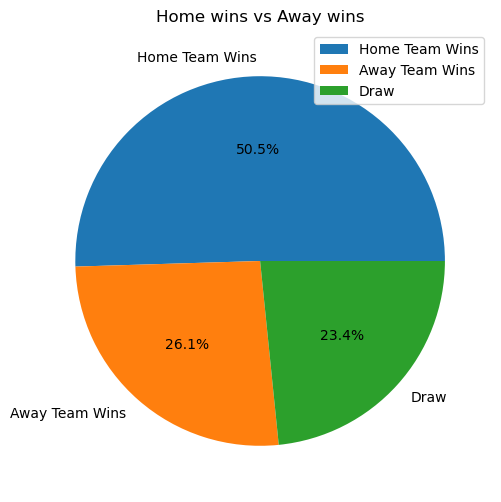

In [60]:
home_wins_count = home_team_wins.shape[0]
away_wins_count = away_team_wins.shape[0]
draw_wins_count = draw.shape[0]

win_counts = [home_wins_count, away_wins_count, draw_wins_count]
labels = ['Home Team Wins', 'Away Team Wins', 'Draw']

plt.figure(figsize=(6, 6))
plt.pie(win_counts, labels=labels, autopct='%1.1f%%')
plt.title('Home wins vs Away wins')
plt.legend()
plt.show()

In [61]:
df_combined

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_total_points,home_rank,away_total_points,away_rank
0,2016-07-24,Uzbekistan,Iraq,2,1,Friendly,Tashkent,Uzbekistan,False,569.00,56.0,354.00,99.0
1,2016-07-28,Cambodia,Singapore,2,1,Friendly,Phnom Penh,Cambodia,False,95.00,180.0,175.00,158.0
2,2016-08-08,Oman,Turkmenistan,1,0,Friendly,Muscat,Oman,False,340.00,106.0,312.00,120.0
3,2016-08-08,Qatar,Iraq,2,1,Friendly,Doha,Qatar,False,425.00,79.0,354.00,99.0
4,2016-08-13,Bhutan,India,0,3,Friendly,Thimphu,Bhutan,False,64.00,192.0,200.00,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4257,2021-07-11,England,Italy,1,1,UEFA Euro,London,England,False,1686.78,4.0,1642.06,7.0
4258,2021-07-11,Namibia,Zimbabwe,2,0,COSAFA Cup,Port Elizabeth,South Africa,True,1168.44,111.0,1175.50,107.0
4259,2021-07-11,Mozambique,Malawi,2,0,COSAFA Cup,Port Elizabeth,South Africa,True,1161.55,117.0,1162.39,115.0
4260,2021-07-11,El Salvador,Guatemala,2,0,Gold Cup,Frisco,United States,True,1341.24,69.0,1129.30,127.0


In [62]:
filtered_only_games_of_teams_of_relevance_df = df_combined[df_combined['home_team'].isin(uefa_countries) | df_combined['away_team'].isin(uefa_countries)]
filtered_only_games_of_teams_of_relevance_df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_total_points,home_rank,away_total_points,away_rank
20,2016-08-31,Albania,Morocco,0,0,Friendly,Shkodër,Albania,False,739.00,37.0,574.00,53.0
21,2016-08-31,Czech Republic,Armenia,3,0,Friendly,Mladá Boleslav,Czech Republic,False,768.00,34.0,348.00,102.0
22,2016-08-31,Denmark,Liechtenstein,5,0,Friendly,Horsens,Denmark,False,630.00,44.0,89.00,182.0
23,2016-08-31,Estonia,Malta,1,1,Friendly,Pärnu,Estonia,False,323.00,117.0,109.00,176.0
24,2016-08-31,Germany,Finland,2,0,Friendly,Mönchengladbach,Germany,False,1319.00,4.0,540.00,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4228,2021-07-03,Czech Republic,Denmark,1,2,UEFA Euro,Baku,Azerbaijan,True,1458.81,40.0,1631.55,10.0
4229,2021-07-03,Ukraine,England,0,4,UEFA Euro,Rome,Italy,True,1514.64,24.0,1686.78,4.0
4239,2021-07-06,Italy,Spain,1,1,UEFA Euro,London,England,True,1642.06,7.0,1648.13,6.0
4245,2021-07-07,England,Denmark,2,1,UEFA Euro,London,England,False,1686.78,4.0,1631.55,10.0


In [63]:
tournament_counts = filtered_only_games_of_teams_of_relevance_df['tournament'].value_counts()
tournament_counts

tournament
Friendly                        453
FIFA World Cup qualification    343
UEFA Nations League             304
UEFA Euro qualification         262
FIFA World Cup                   51
UEFA Euro                        51
Confederations Cup               12
Baltic Cup                        6
King's Cup                        1
Kirin Challenge Cup               1
Name: count, dtype: int64

In [64]:
filtered_out_irrelevant_tournaments = filtered_only_games_of_teams_of_relevance_df.reset_index(drop=True)
filtered_out_irrelevant_tournaments

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,home_total_points,home_rank,away_total_points,away_rank
0,2016-08-31,Albania,Morocco,0,0,Friendly,Shkodër,Albania,False,739.00,37.0,574.00,53.0
1,2016-08-31,Czech Republic,Armenia,3,0,Friendly,Mladá Boleslav,Czech Republic,False,768.00,34.0,348.00,102.0
2,2016-08-31,Denmark,Liechtenstein,5,0,Friendly,Horsens,Denmark,False,630.00,44.0,89.00,182.0
3,2016-08-31,Estonia,Malta,1,1,Friendly,Pärnu,Estonia,False,323.00,117.0,109.00,176.0
4,2016-08-31,Germany,Finland,2,0,Friendly,Mönchengladbach,Germany,False,1319.00,4.0,540.00,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,2021-07-03,Czech Republic,Denmark,1,2,UEFA Euro,Baku,Azerbaijan,True,1458.81,40.0,1631.55,10.0
1480,2021-07-03,Ukraine,England,0,4,UEFA Euro,Rome,Italy,True,1514.64,24.0,1686.78,4.0
1481,2021-07-06,Italy,Spain,1,1,UEFA Euro,London,England,True,1642.06,7.0,1648.13,6.0
1482,2021-07-07,England,Denmark,2,1,UEFA Euro,London,England,False,1686.78,4.0,1631.55,10.0


In [65]:
def find_friendly(x):
    if x == "Friendly":
        return 1
    else: return 0

filtered_out_irrelevant_tournaments["is_friendly"] = filtered_out_irrelevant_tournaments["tournament"].apply(lambda x: find_friendly(x))

In [66]:
filtered_out_irrelevant_columns = filtered_out_irrelevant_tournaments.drop(columns=['city', 'country'])
filtered_out_irrelevant_columns

,date,home_team,away_team,home_score,away_score,tournament,neutral,home_total_points,home_rank,away_total_points,away_rank,is_friendly
0,2016-08-31,Albania,Morocco,0,0,Friendly,False,739.00,37.0,574.00,53.0,1
1,2016-08-31,Czech Republic,Armenia,3,0,Friendly,False,768.00,34.0,348.00,102.0,1
2,2016-08-31,Denmark,Liechtenstein,5,0,Friendly,False,630.00,44.0,89.00,182.0,1
3,2016-08-31,Estonia,Malta,1,1,Friendly,False,323.00,117.0,109.00,176.0,1
4,2016-08-31,Germany,Finland,2,0,Friendly,False,1319.00,4.0,540.00,61.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1479,2021-07-03,Czech Republic,Denmark,1,2,UEFA Euro,True,1458.81,40.0,1631.55,10.0,0
1480,2021-07-03,Ukraine,England,0,4,UEFA Euro,True,1514.64,24.0,1686.78,4.0,0
1481,2021-07-06,Italy,Spain,1,1,UEFA Euro,True,1642.06,7.0,1648.13,6.0,0
1482,2021-07-07,England,Denmark,2,1,UEFA Euro,False,1686.78,4.0,1631.55,10.0,0


Next, i will analyze win rate for every team, goals per game per team, goals conceded per game per team (last 30 and last 4)
Later this will get calculated with the level of opponent faced
Also i would like to add historical matchups, so teams that have faced each other before, i would like to see if there is a pattern
If possible i also would like to add and find a correlation between betting odds and actual results

In [67]:
df = filtered_out_irrelevant_columns
df

,date,home_team,away_team,home_score,away_score,tournament,neutral,home_total_points,home_rank,away_total_points,away_rank,is_friendly
0,2016-08-31,Albania,Morocco,0,0,Friendly,False,739.00,37.0,574.00,53.0,1
1,2016-08-31,Czech Republic,Armenia,3,0,Friendly,False,768.00,34.0,348.00,102.0,1
2,2016-08-31,Denmark,Liechtenstein,5,0,Friendly,False,630.00,44.0,89.00,182.0,1
3,2016-08-31,Estonia,Malta,1,1,Friendly,False,323.00,117.0,109.00,176.0,1
4,2016-08-31,Germany,Finland,2,0,Friendly,False,1319.00,4.0,540.00,61.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1479,2021-07-03,Czech Republic,Denmark,1,2,UEFA Euro,True,1458.81,40.0,1631.55,10.0,0
1480,2021-07-03,Ukraine,England,0,4,UEFA Euro,True,1514.64,24.0,1686.78,4.0,0
1481,2021-07-06,Italy,Spain,1,1,UEFA Euro,True,1642.06,7.0,1648.13,6.0,0
1482,2021-07-07,England,Denmark,2,1,UEFA Euro,False,1686.78,4.0,1631.55,10.0,0


In [68]:
def get_average_games_per_year(df, uefa_countries):
    df_home_average = df[df['home_team'].isin(uefa_countries)].copy()
    df_home_average['country'] = df_home_average['home_team']
    df_away_average = df[df['away_team'].isin(uefa_countries)].copy()
    df_away_average['country'] = df_away_average['away_team']

    df_average = pd.concat([df_home_average, df_away_average])
    df_average['year'] = df_average['date'].dt.year

    games_per_country_year = df_average.groupby(['country', 'year']).size().reset_index(name='games_count')
    average_games_per_country = games_per_country_year.groupby('country')['games_count'].mean().reset_index(name='average_games_per_year')

    return average_games_per_country

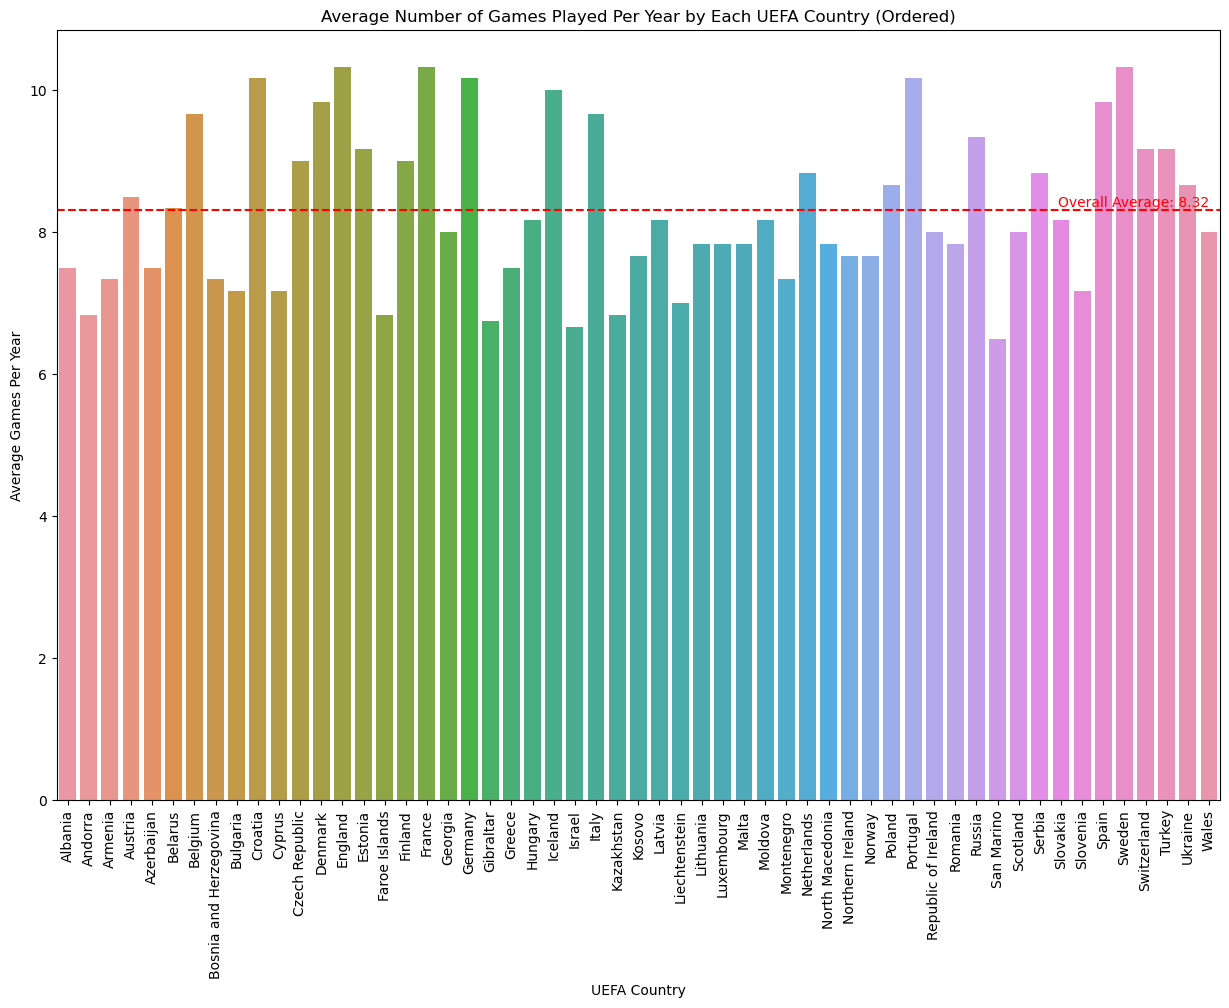

In [69]:
sorted_average_games_per_country = get_average_games_per_year(df, uefa_countries=uefa_countries)

# Calculate the overall average
overall_average = sorted_average_games_per_country['average_games_per_year'].mean()

# Visualization
plt.figure(figsize=(15, 10))
sns.barplot(x='country', y='average_games_per_year', data=sorted_average_games_per_country)
plt.xticks(rotation=90)
plt.xlabel('UEFA Country')
plt.ylabel('Average Games Per Year')
plt.title('Average Number of Games Played Per Year by Each UEFA Country (Ordered)')

# Draw a line at the overall average
plt.axhline(y=overall_average, color='r', linestyle='--')
plt.text(len(sorted_average_games_per_country)-1, overall_average, f'Overall Average: {overall_average:.2f}', color='r', va='bottom', ha='right')

plt.show()

In [70]:
# Initialize dictionaries to hold points and total matches
points = {}
total_matches = {}

# Iterate through each row to calculate points
for index, row in df.iterrows():
    home_team = row['home_team']
    away_team = row['away_team']
    home_score = row['home_score']
    away_score = row['away_score']

    # Check if teams are in UEFA countries list
    if home_team not in uefa_countries or away_team not in uefa_countries:
        continue

    # Initialize teams in dictionaries if not already present
    for team in [home_team, away_team]:
        if team not in total_matches:
            points[team] = 0
            total_matches[team] = 0

    # Increment total matches
    total_matches[home_team] += 1
    total_matches[away_team] += 1

    # Assign points based on match outcome
    if home_score > away_score:
        points[home_team] += 3
    elif home_score < away_score:
        points[away_team] += 3
    else:
        points[home_team] += 1
        points[away_team] += 1

# Calculate points per game
points_per_game = {team: (points[team] / total_matches[team]) for team in total_matches}

# Convert to DataFrame for easier viewing
points_per_game_df = pd.DataFrame(list(points_per_game.items()), columns=['Team', 'Points Per Game'])

# Sort by Points Per Game in descending order
points_per_game_df_sorted = points_per_game_df.sort_values(by='Points Per Game', ascending=False)

# Set the option to display up to the number of teams in the list
pd.set_option('display.max_rows', len(uefa_countries))

# Display the sorted DataFrame
points_per_game_df_sorted

,Team,Points Per Game
12,Belgium,2.408163
15,France,2.264151
14,Italy,2.203704
13,Spain,2.113208
31,England,2.090909
53,Portugal,2.081633
6,Germany,1.960000
52,Switzerland,1.877551
2,Denmark,1.870370
16,Netherlands,1.840000


In [71]:
# Initialize dictionaries to hold points and total matches for home teams
home_points = {}
home_matches = {}

# Iterate through each row to calculate points for home teams
for index, row in df.iterrows():
    home_team = row['home_team']
    home_score = row['home_score']
    away_score = row['away_score']

    # Check if home team is in UEFA countries list
    if home_team in uefa_countries:
        # Initialize home team in dictionaries if not already present
        if home_team not in home_matches:
            home_points[home_team] = 0
            home_matches[home_team] = 0

        # Increment home matches
        home_matches[home_team] += 1

        # Assign points based on match outcome for home team
        if home_score > away_score:
            home_points[home_team] += 3
        elif home_score == away_score:
            home_points[home_team] += 1

# Calculate points per game for home teams
home_ppg = {team: (home_points[team] / home_matches[team]) for team in home_matches}

# Convert to DataFrame for easier viewing
home_ppg_df = pd.DataFrame(list(home_ppg.items()), columns=['Team', 'Home Points Per Game'])

# Sort by Home Points Per Game in descending order
home_ppg_df_sorted = home_ppg_df.sort_values(by='Home Points Per Game', ascending=False)

# Set the option to display up to the number of teams in the list
pd.set_option('display.max_rows', len(uefa_countries))

# Display the sorted DataFrame
print("Home Performance:")
home_ppg_df_sorted


Home Performance:


,Team,Home Points Per Game
8,Belgium,2.529412
23,Spain,2.392857
41,France,2.378378
48,England,2.351351
34,Switzerland,2.285714
9,Italy,2.200000
45,Portugal,2.114286
24,Ukraine,2.103448
18,Croatia,2.035714
39,North Macedonia,2.000000


In [72]:
away_points = {}
away_matches = {}
# Iterate through each row to calculate points for away teams
for index, row in df.iterrows():
    away_team = row['away_team']
    home_score = row['home_score']
    away_score = row['away_score']

    # Check if away team is in UEFA countries list
    if away_team in uefa_countries:
        # Initialize away team in dictionaries if not already present
        if away_team not in away_matches:
            away_points[away_team] = 0
            away_matches[away_team] = 0

        # Increment away matches
        away_matches[away_team] += 1

        # Assign points based on match outcome for away team
        if home_score < away_score:
            away_points[away_team] += 3
        elif home_score == away_score:
            away_points[away_team] += 1

# Calculate points per game for away teams
away_ppg = {team: (away_points[team] / away_matches[team]) for team in away_matches}

# Convert to DataFrame for easier viewing
away_ppg_df = pd.DataFrame(list(away_ppg.items()), columns=['Team', 'Away Points Per Game'])

# Sort by Away Points Per Game in descending order
away_ppg_df_sorted = away_ppg_df.sort_values(by='Away Points Per Game', ascending=False)

# Display the sorted DataFrame
print("Away Performance:")
away_ppg_df_sorted


Away Performance:


,Team,Away Points Per Game
28,Belgium,2.375000
22,Italy,2.217391
7,France,2.160000
31,Portugal,1.961538
6,Spain,1.903226
14,Germany,1.869565
51,Denmark,1.814815
17,England,1.800000
30,Netherlands,1.760000
11,Poland,1.600000


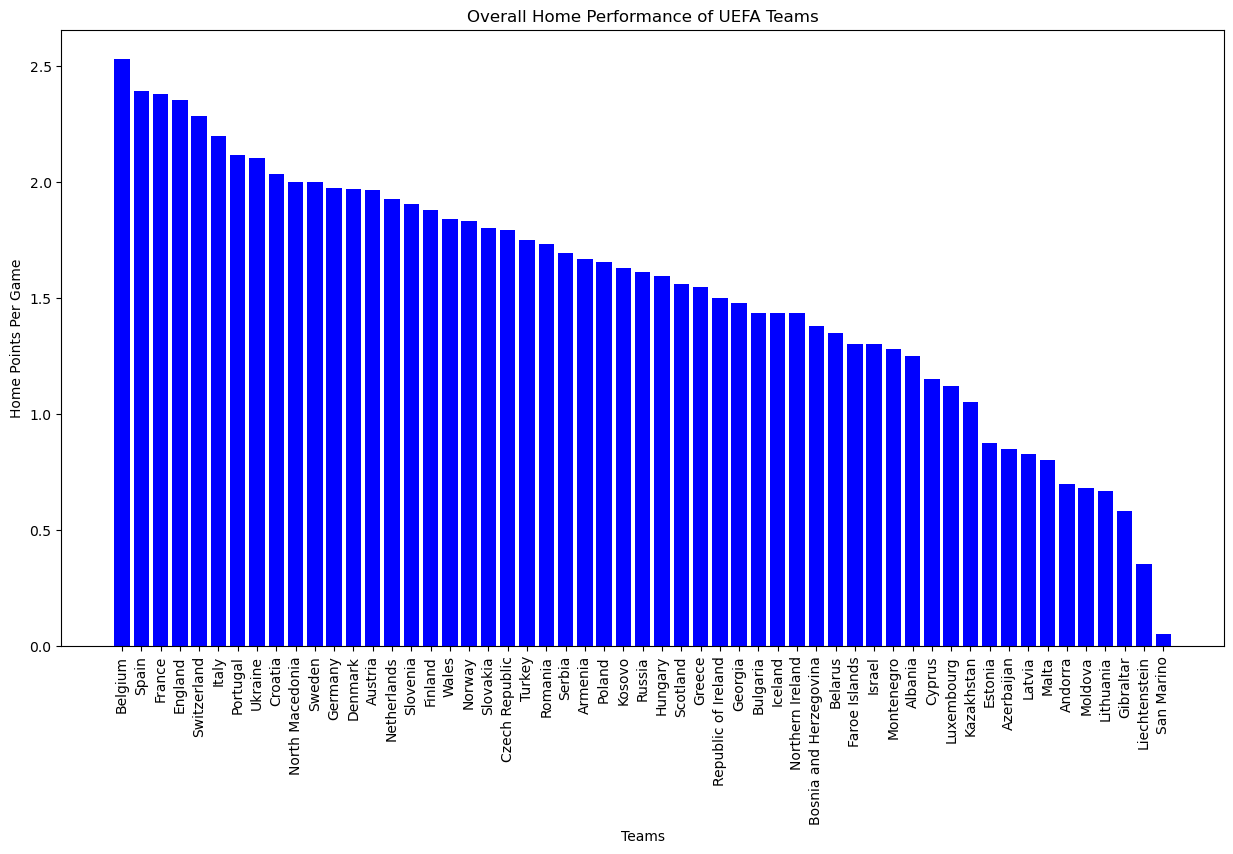

In [73]:
# Plot for Home Points Per Game
plt.figure(figsize=(15, 8))
plt.bar(home_ppg_df_sorted['Team'], home_ppg_df_sorted['Home Points Per Game'], color='blue')
plt.xlabel('Teams')
plt.ylabel('Home Points Per Game')
plt.title('Overall Home Performance of UEFA Teams')
plt.xticks(rotation=90)  # Rotates the team names for better visibility
plt.show()

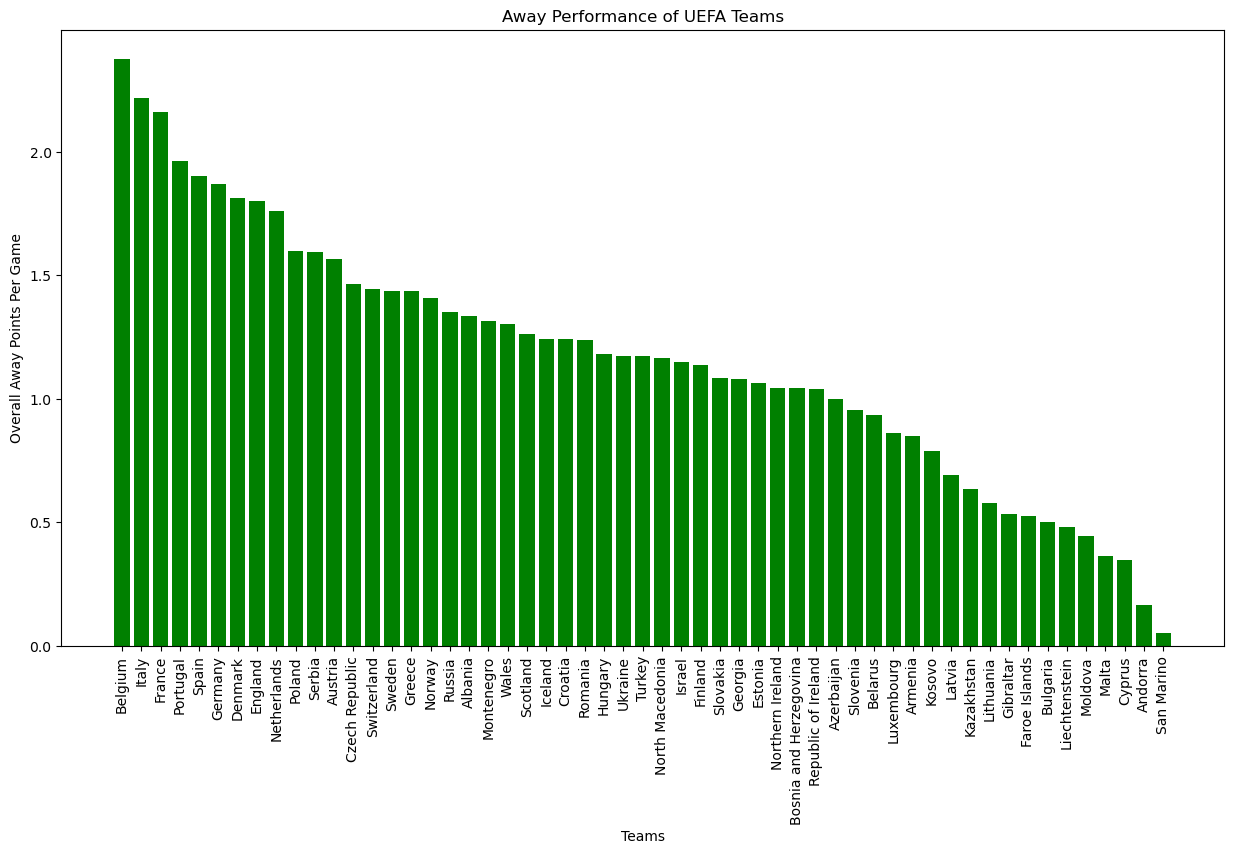

In [74]:
# Plot for Away Points Per Game
plt.figure(figsize=(15, 8))
plt.bar(away_ppg_df_sorted['Team'], away_ppg_df_sorted['Away Points Per Game'], color='green')
plt.xlabel('Teams')
plt.ylabel('Overall Away Points Per Game')
plt.title('Away Performance of UEFA Teams')
plt.xticks(rotation=90)  # Rotates the team names for better visibility
plt.show()

In [75]:
def calculate_recent_form(df, num_games):
    recent_form = {}
    for index, row in df.iterrows():
        for team in [row['home_team'], row['away_team']]:
            if team not in recent_form:
                recent_form[team] = []

        # Calculate points and update recent games list
        home_points = 3 if row['home_score'] > row['away_score'] else 1 if row['home_score'] == row['away_score'] else 0
        away_points = 3 if row['away_score'] > row['home_score'] else 1 if row['away_score'] == row['home_score'] else 0

        recent_form[row['home_team']].append(home_points)
        recent_form[row['away_team']].append(away_points)

        # Keep only the last 'num_games' results
        recent_form[row['home_team']] = recent_form[row['home_team']][-num_games:]
        recent_form[row['away_team']] = recent_form[row['away_team']][-num_games:]

    # Calculate average points per game for the recent form
    avg_recent_form = {team: sum(points) / len(points) if points else 0 for team, points in recent_form.items()}
    return avg_recent_form
df

,date,home_team,away_team,home_score,away_score,tournament,neutral,home_total_points,home_rank,away_total_points,away_rank,is_friendly
0,2016-08-31,Albania,Morocco,0,0,Friendly,False,739.00,37.0,574.00,53.0,1
1,2016-08-31,Czech Republic,Armenia,3,0,Friendly,False,768.00,34.0,348.00,102.0,1
2,2016-08-31,Denmark,Liechtenstein,5,0,Friendly,False,630.00,44.0,89.00,182.0,1
3,2016-08-31,Estonia,Malta,1,1,Friendly,False,323.00,117.0,109.00,176.0,1
4,2016-08-31,Germany,Finland,2,0,Friendly,False,1319.00,4.0,540.00,61.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1479,2021-07-03,Czech Republic,Denmark,1,2,UEFA Euro,True,1458.81,40.0,1631.55,10.0,0
1480,2021-07-03,Ukraine,England,0,4,UEFA Euro,True,1514.64,24.0,1686.78,4.0,0
1481,2021-07-06,Italy,Spain,1,1,UEFA Euro,True,1642.06,7.0,1648.13,6.0,0
1482,2021-07-07,England,Denmark,2,1,UEFA Euro,False,1686.78,4.0,1631.55,10.0,0


In [76]:
recent_form_16 = calculate_recent_form(df, 16)
recent_form_4 = calculate_recent_form(df, 4)

In [77]:
recent_form_16_df = pd.DataFrame(list(recent_form_16.items()), columns=['Team', 'Recent Form 16 Games'])
recent_form_4_df = pd.DataFrame(list(recent_form_4.items()), columns=['Team', 'Recent Form 4 Games'])
df

,date,home_team,away_team,home_score,away_score,tournament,neutral,home_total_points,home_rank,away_total_points,away_rank,is_friendly
0,2016-08-31,Albania,Morocco,0,0,Friendly,False,739.00,37.0,574.00,53.0,1
1,2016-08-31,Czech Republic,Armenia,3,0,Friendly,False,768.00,34.0,348.00,102.0,1
2,2016-08-31,Denmark,Liechtenstein,5,0,Friendly,False,630.00,44.0,89.00,182.0,1
3,2016-08-31,Estonia,Malta,1,1,Friendly,False,323.00,117.0,109.00,176.0,1
4,2016-08-31,Germany,Finland,2,0,Friendly,False,1319.00,4.0,540.00,61.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1479,2021-07-03,Czech Republic,Denmark,1,2,UEFA Euro,True,1458.81,40.0,1631.55,10.0,0
1480,2021-07-03,Ukraine,England,0,4,UEFA Euro,True,1514.64,24.0,1686.78,4.0,0
1481,2021-07-06,Italy,Spain,1,1,UEFA Euro,True,1642.06,7.0,1648.13,6.0,0
1482,2021-07-07,England,Denmark,2,1,UEFA Euro,False,1686.78,4.0,1631.55,10.0,0


In [78]:
# Rename columns in the recent form DataFrames to reflect home and away teams
recent_form_16_df.columns = ['Team', 'Recent Form 16 Games']
recent_form_4_df.columns = ['Team', 'Recent Form 4 Games']

# Create separate DataFrames for home and away teams
home_recent_form_16 = recent_form_16_df.rename(columns={'Recent Form 16 Games': 'Home Team Recent Form 16'})
home_recent_form_4 = recent_form_4_df.rename(columns={'Recent Form 4 Games': 'Home Team Recent Form 4'})

away_recent_form_16 = recent_form_16_df.rename(columns={'Recent Form 16 Games': 'Away Team Recent Form 16'})
away_recent_form_4 = recent_form_4_df.rename(columns={'Recent Form 4 Games': 'Away Team Recent Form 4'})
df


,date,home_team,away_team,home_score,away_score,tournament,neutral,home_total_points,home_rank,away_total_points,away_rank,is_friendly
0,2016-08-31,Albania,Morocco,0,0,Friendly,False,739.00,37.0,574.00,53.0,1
1,2016-08-31,Czech Republic,Armenia,3,0,Friendly,False,768.00,34.0,348.00,102.0,1
2,2016-08-31,Denmark,Liechtenstein,5,0,Friendly,False,630.00,44.0,89.00,182.0,1
3,2016-08-31,Estonia,Malta,1,1,Friendly,False,323.00,117.0,109.00,176.0,1
4,2016-08-31,Germany,Finland,2,0,Friendly,False,1319.00,4.0,540.00,61.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1479,2021-07-03,Czech Republic,Denmark,1,2,UEFA Euro,True,1458.81,40.0,1631.55,10.0,0
1480,2021-07-03,Ukraine,England,0,4,UEFA Euro,True,1514.64,24.0,1686.78,4.0,0
1481,2021-07-06,Italy,Spain,1,1,UEFA Euro,True,1642.06,7.0,1648.13,6.0,0
1482,2021-07-07,England,Denmark,2,1,UEFA Euro,False,1686.78,4.0,1631.55,10.0,0


In [79]:
# Merge the home team recent form data with unique suffixes
df = df.merge(home_recent_form_16, how='left', left_on='home_team', right_on='Team', suffixes=('', '_home30'))
df = df.merge(home_recent_form_4, how='left', left_on='home_team', right_on='Team', suffixes=('', '_home4'))

# Merge the away team recent form data with unique suffixes
df = df.merge(away_recent_form_16, how='left', left_on='away_team', right_on='Team', suffixes=('', '_away30'))
df = df.merge(away_recent_form_4, how='left', left_on='away_team', right_on='Team', suffixes=('', '_away4'))

# Drop the redundant 'Team' columns and any other duplicates
df.drop(columns=['Team', 'Team_home30', 'Team_home4', 'Team_away30', 'Team_away4'], inplace=True, errors='ignore')

# Rename the columns to reflect the correct data
df.rename(columns={
    'Home Team Recent Form 16_home16': 'Home Team Recent Form 16',
    'Home Team Recent Form 4_home4': 'Home Team Recent Form 4',
    'Away Team Recent Form 16_away16': 'Away Team Recent Form 16',
    'Away Team Recent Form 4_away4': 'Away Team Recent Form 4'
}, inplace=True)

df

,date,home_team,away_team,home_score,away_score,tournament,neutral,home_total_points,home_rank,away_total_points,away_rank,is_friendly,Home Team Recent Form 16,Home Team Recent Form 4,Away Team Recent Form 16,Away Team Recent Form 4
0,2016-08-31,Albania,Morocco,0,0,Friendly,False,739.00,37.0,574.00,53.0,1,1.5625,1.00,1.333333,1.75
1,2016-08-31,Czech Republic,Armenia,3,0,Friendly,False,768.00,34.0,348.00,102.0,1,1.6250,1.00,1.562500,1.75
2,2016-08-31,Denmark,Liechtenstein,5,0,Friendly,False,630.00,44.0,89.00,182.0,1,2.1250,2.25,0.625000,0.00
3,2016-08-31,Estonia,Malta,1,1,Friendly,False,323.00,117.0,109.00,176.0,1,0.7500,2.25,1.000000,0.25
4,2016-08-31,Germany,Finland,2,0,Friendly,False,1319.00,4.0,540.00,61.0,1,1.6250,1.00,1.250000,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,2021-07-03,Czech Republic,Denmark,1,2,UEFA Euro,True,1458.81,40.0,1631.55,10.0,0,1.6250,1.00,2.125000,2.25
1480,2021-07-03,Ukraine,England,0,4,UEFA Euro,True,1514.64,24.0,1686.78,4.0,0,1.1875,1.50,2.375000,2.50
1481,2021-07-06,Italy,Spain,1,1,UEFA Euro,True,1642.06,7.0,1648.13,6.0,0,2.6250,2.00,1.812500,2.00
1482,2021-07-07,England,Denmark,2,1,UEFA Euro,False,1686.78,4.0,1631.55,10.0,0,2.3750,2.50,2.125000,2.25


In [80]:
def calculate_average_goals_scored(df, num_games, uefa_countries):
    goals_scored = {team: [] for team in uefa_countries}  # Initialize with UEFA teams

    for index, row in df.iterrows():
        home_team = row['home_team']
        away_team = row['away_team']

        # Track goals scored by each team, regardless of home or away status
        if home_team in uefa_countries:
            goals_scored[home_team].append(row['home_score'])  # Goals scored in a home game

        if away_team in uefa_countries:
            goals_scored[away_team].append(row['away_score'])  # Goals scored in an away game

        # Keep only the last 'num_games' results for each team
        for team in [home_team, away_team]:
            if team in uefa_countries:
                goals_scored[team] = goals_scored[team][-num_games:]

    avg_goals_scored = {team: (sum(goals) / len(goals)) if goals else 0 for team, goals in goals_scored.items()}
    return avg_goals_scored


In [81]:
avg_goals_16 = calculate_average_goals_scored(df, 16, uefa_countries)
avg_goals_4 = calculate_average_goals_scored(df, 4, uefa_countries)

avg_goals_16_df = pd.DataFrame(list(avg_goals_16.items()), columns=['Team', 'Avg Goals Last 16'])
avg_goals_4_df = pd.DataFrame(list(avg_goals_4.items()), columns=['Team', 'Avg Goals Last 4'])

In [82]:
# Merge and rename for average goals in the last 30 games
df = df.merge(avg_goals_16_df, how='left', left_on='home_team', right_on='Team')
df.rename(columns={'Avg Goals Last 16': 'Home Team Avg Goals Last 16'}, inplace=True)
df.drop(columns=['Team'], inplace=True, errors='ignore')

df = df.merge(avg_goals_16_df, how='left', left_on='away_team', right_on='Team')
df.rename(columns={'Avg Goals Last 16': 'Away Team Avg Goals Last 16'}, inplace=True)
df.drop(columns=['Team'], inplace=True, errors='ignore')

# Merge and rename for average goals in the last 4 games
df = df.merge(avg_goals_4_df, how='left', left_on='home_team', right_on='Team')
df.rename(columns={'Avg Goals Last 4': 'Home Team Avg Goals Last 4'}, inplace=True)
df.drop(columns=['Team'], inplace=True, errors='ignore')

df = df.merge(avg_goals_4_df, how='left', left_on='away_team', right_on='Team')
df.rename(columns={'Avg Goals Last 4': 'Away Team Avg Goals Last 4'}, inplace=True)
df.drop(columns=['Team'], inplace=True, errors='ignore')

In [83]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'neutral', 'home_total_points', 'home_rank',
       'away_total_points', 'away_rank', 'is_friendly',
       'Home Team Recent Form 16', 'Home Team Recent Form 4',
       'Away Team Recent Form 16', 'Away Team Recent Form 4',
       'Home Team Avg Goals Last 16', 'Away Team Avg Goals Last 16',
       'Home Team Avg Goals Last 4', 'Away Team Avg Goals Last 4'],
      dtype='object')

In [84]:
def calculate_average_goals_conceded(df, num_games, uefa_countries):
    goals_conceded = {team: [] for team in uefa_countries}  # Initialize with UEFA teams

    for index, row in df.iterrows():
        home_team = row['home_team']
        away_team = row['away_team']

        # Track goals conceded by each team, regardless of home or away status
        if home_team in uefa_countries:
            goals_conceded[home_team].append(row['away_score'])  # Goals conceded in a home game

        if away_team in uefa_countries:
            goals_conceded[away_team].append(row['home_score'])  # Goals conceded in an away game

        # Keep only the last 'num_games' results for each team
        for team in [home_team, away_team]:
            if team in uefa_countries:
                goals_conceded[team] = goals_conceded[team][-num_games:]

    avg_goals_conceded = {team: (sum(goals) / len(goals)) if goals else 0 for team, goals in goals_conceded.items()}
    return avg_goals_conceded

In [85]:
avg_goals_conceded_16 = calculate_average_goals_conceded(df, 16, uefa_countries)
avg_goals_conceded_4 = calculate_average_goals_conceded(df, 4, uefa_countries)

avg_goals_conceded_16_df = pd.DataFrame(list(avg_goals_conceded_16.items()), columns=['Team', 'Avg Goals Conceded Last 16'])
avg_goals_conceded_4_df = pd.DataFrame(list(avg_goals_conceded_4.items()), columns=['Team', 'Avg Goals Conceded Last 4'])

In [86]:
# Merge and rename for average goals conceded in the last 30 games
df = df.merge(avg_goals_conceded_16_df, how='left', left_on='home_team', right_on='Team')
df.rename(columns={'Avg Goals Conceded Last 16': 'Home Team Avg Goals Conceded Last 16'}, inplace=True)
df.drop(columns=['Team'], inplace=True, errors='ignore')

df = df.merge(avg_goals_conceded_16_df, how='left', left_on='away_team', right_on='Team')
df.rename(columns={'Avg Goals Conceded Last 16': 'Away Team Avg Goals Conceded Last 16'}, inplace=True)
df.drop(columns=['Team'], inplace=True, errors='ignore')

# Merge and rename for average goals conceded in the last 4 games
df = df.merge(avg_goals_conceded_4_df, how='left', left_on='home_team', right_on='Team')
df.rename(columns={'Avg Goals Conceded Last 4': 'Home Team Avg Goals Conceded Last 4'}, inplace=True)
df.drop(columns=['Team'], inplace=True, errors='ignore')

df = df.merge(avg_goals_conceded_4_df, how='left', left_on='away_team', right_on='Team')
df.rename(columns={'Avg Goals Conceded Last 4': 'Away Team Avg Goals Conceded Last 4'}, inplace=True)
df.drop(columns=['Team'], inplace=True, errors='ignore')

In [87]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'neutral', 'home_total_points', 'home_rank',
       'away_total_points', 'away_rank', 'is_friendly',
       'Home Team Recent Form 16', 'Home Team Recent Form 4',
       'Away Team Recent Form 16', 'Away Team Recent Form 4',
       'Home Team Avg Goals Last 16', 'Away Team Avg Goals Last 16',
       'Home Team Avg Goals Last 4', 'Away Team Avg Goals Last 4',
       'Home Team Avg Goals Conceded Last 16',
       'Away Team Avg Goals Conceded Last 16',
       'Home Team Avg Goals Conceded Last 4',
       'Away Team Avg Goals Conceded Last 4'],
      dtype='object')

In [88]:
# Calculate total goals scored and conceded for each team across all matches
total_goals_scored = df.groupby('home_team')['home_score'].sum() + df.groupby('away_team')['away_score'].sum()
total_goals_conceded = df.groupby('home_team')['away_score'].sum() + df.groupby('away_team')['home_score'].sum()

# Calculate total number of games played by each team (both as home and away)
total_games = df.groupby('home_team').size() + df.groupby('away_team').size()

# Calculate average goals scored and conceded per game for each team
avg_goals_scored = total_goals_scored / total_games
avg_goals_conceded = total_goals_conceded / total_games

# Calculate overall average goal difference for each team
overall_goal_difference = avg_goals_scored - avg_goals_conceded

# Map the overall goal difference to the home and away teams in each match
df['Home Team Overall Goal Difference'] = df['home_team'].map(overall_goal_difference)
df['Away Team Overall Goal Difference'] = df['away_team'].map(overall_goal_difference)


In [89]:
df

,date,home_team,away_team,home_score,away_score,tournament,neutral,home_total_points,home_rank,away_total_points,...,Home Team Avg Goals Last 16,Away Team Avg Goals Last 16,Home Team Avg Goals Last 4,Away Team Avg Goals Last 4,Home Team Avg Goals Conceded Last 16,Away Team Avg Goals Conceded Last 16,Home Team Avg Goals Conceded Last 4,Away Team Avg Goals Conceded Last 4,Home Team Overall Goal Difference,Away Team Overall Goal Difference
0,2016-08-31,Albania,Morocco,0,0,Friendly,False,739.00,37.0,574.00,...,1.2500,NaN,0.75,NaN,0.9375,NaN,1.25,NaN,-0.244444,0.111111
1,2016-08-31,Czech Republic,Armenia,3,0,Friendly,False,768.00,34.0,348.00,...,1.4375,1.4375,1.00,1.75,1.0625,1.7500,1.00,1.50,0.277778,-0.363636
2,2016-08-31,Denmark,Liechtenstein,5,0,Friendly,False,630.00,44.0,89.00,...,2.4375,0.5625,2.75,0.50,0.8125,2.5625,1.00,5.25,1.271186,-2.404762
3,2016-08-31,Estonia,Malta,1,1,Friendly,False,323.00,117.0,109.00,...,0.8750,1.1250,1.00,0.75,2.1250,1.8125,0.50,2.50,-0.945455,-1.446809
4,2016-08-31,Germany,Finland,2,0,Friendly,False,1319.00,4.0,540.00,...,2.0000,1.0000,1.50,0.25,1.6250,1.3750,1.75,1.00,1.229508,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,2021-07-03,Czech Republic,Denmark,1,2,UEFA Euro,True,1458.81,40.0,1631.55,...,1.4375,2.4375,1.00,2.75,1.0625,0.8125,1.00,1.00,0.277778,1.271186
1480,2021-07-03,Ukraine,England,0,4,UEFA Euro,True,1514.64,24.0,1686.78,...,1.1250,1.8125,1.00,2.25,1.5000,0.3750,1.75,0.50,0.173077,1.338710
1481,2021-07-06,Italy,Spain,1,1,UEFA Euro,True,1642.06,7.0,1648.13,...,2.4375,2.0000,1.50,3.00,0.3125,0.7500,1.00,1.25,1.620690,1.830508
1482,2021-07-07,England,Denmark,2,1,UEFA Euro,False,1686.78,4.0,1631.55,...,1.8125,2.4375,2.25,2.75,0.3750,0.8125,0.50,1.00,1.338710,1.271186


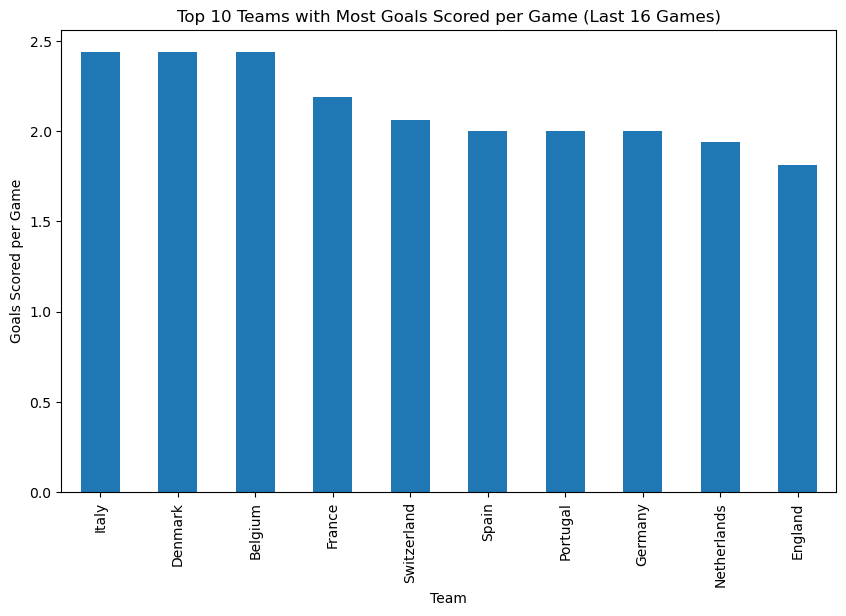

In [90]:
# Plot for Most Goals Scored per Game
plt.figure(figsize=(10, 6))
df.groupby('home_team')['Home Team Avg Goals Last 16'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Teams with Most Goals Scored per Game (Last 16 Games)')
plt.ylabel('Goals Scored per Game')
plt.xlabel('Team')
plt.show()

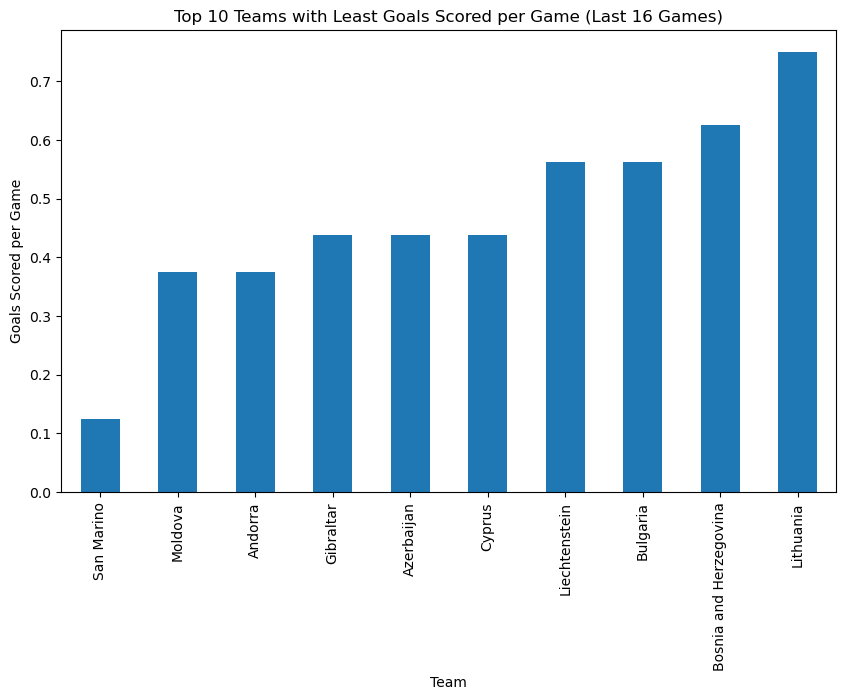

In [91]:
# Plot for Least Goals Scored per Game
plt.figure(figsize=(10, 6))
df.groupby('home_team')['Home Team Avg Goals Last 16'].mean().sort_values(ascending=True).head(10).plot(kind='bar')
plt.title('Top 10 Teams with Least Goals Scored per Game (Last 16 Games)')
plt.ylabel('Goals Scored per Game')
plt.xlabel('Team')
plt.show()


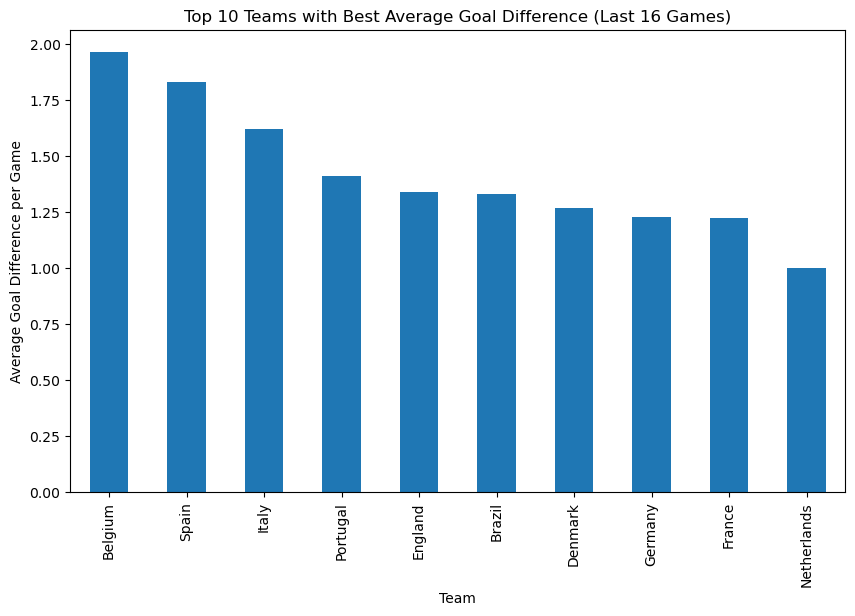

In [92]:
# Plot for Best Average Goal Difference per Game
plt.figure(figsize=(10, 6))
df.groupby('home_team')['Home Team Overall Goal Difference'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Top 10 Teams with Best Average Goal Difference (Last 16 Games)')
plt.ylabel('Average Goal Difference per Game')
plt.xlabel('Team')
plt.show()

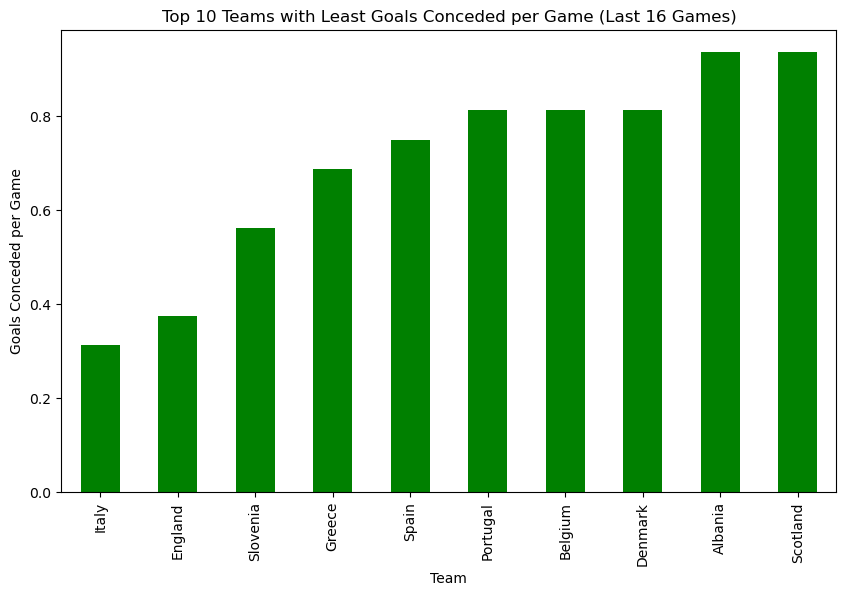

In [93]:
# Plot for Least Goals Conceded per Game
plt.figure(figsize=(10, 6))
df.groupby('home_team')['Home Team Avg Goals Conceded Last 16'].mean().sort_values(ascending=True).head(10).plot(kind='bar', color='green')
plt.title('Top 10 Teams with Least Goals Conceded per Game (Last 16 Games)')
plt.ylabel('Goals Conceded per Game')
plt.xlabel('Team')
plt.show()

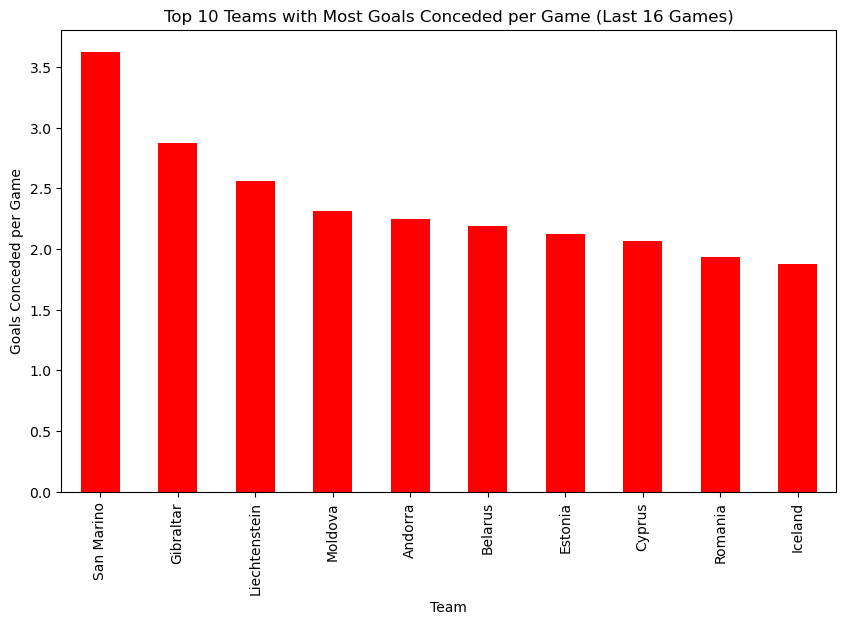

In [94]:
# Plot for Most Goals Conceded per Game
plt.figure(figsize=(10, 6))
df.groupby('home_team')['Home Team Avg Goals Conceded Last 16'].mean().sort_values(ascending=False).head(10).plot(kind='bar', color='red')
plt.title('Top 10 Teams with Most Goals Conceded per Game (Last 16 Games)')
plt.ylabel('Goals Conceded per Game')
plt.xlabel('Team')
plt.show()

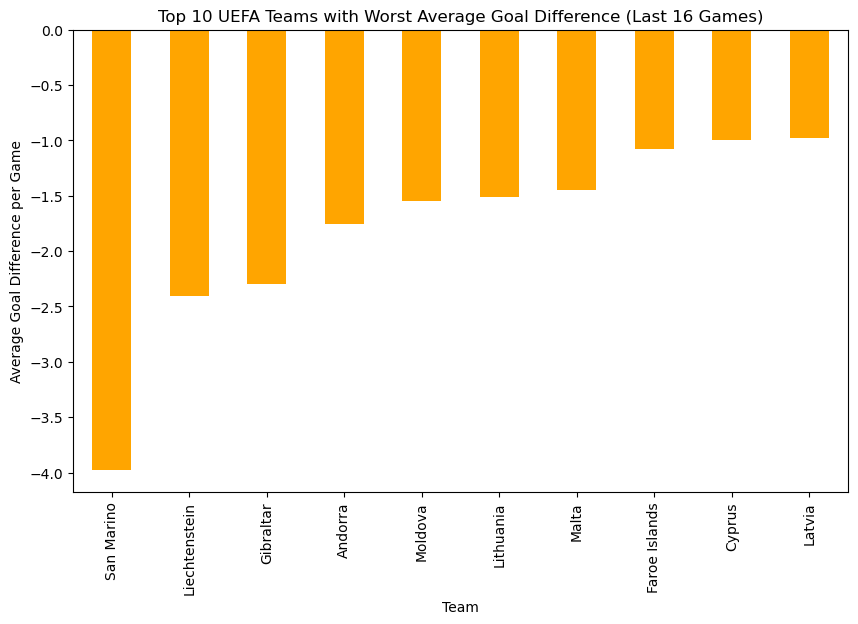

In [95]:
# Filter the DataFrame to include only rows where the home_team is in uefa_teams
filtered_df = df[df['home_team'].isin(uefa_countries)]

# Plotting the filtered data
plt.figure(figsize=(10, 6))
(filtered_df.groupby('home_team')['Home Team Overall Goal Difference']
 .mean()
 .sort_values(ascending=True)
 .head(10)
 .plot(kind='bar', color='orange'))

plt.title('Top 10 UEFA Teams with Worst Average Goal Difference (Last 16 Games)')
plt.ylabel('Average Goal Difference per Game')
plt.xlabel('Team')
plt.show()

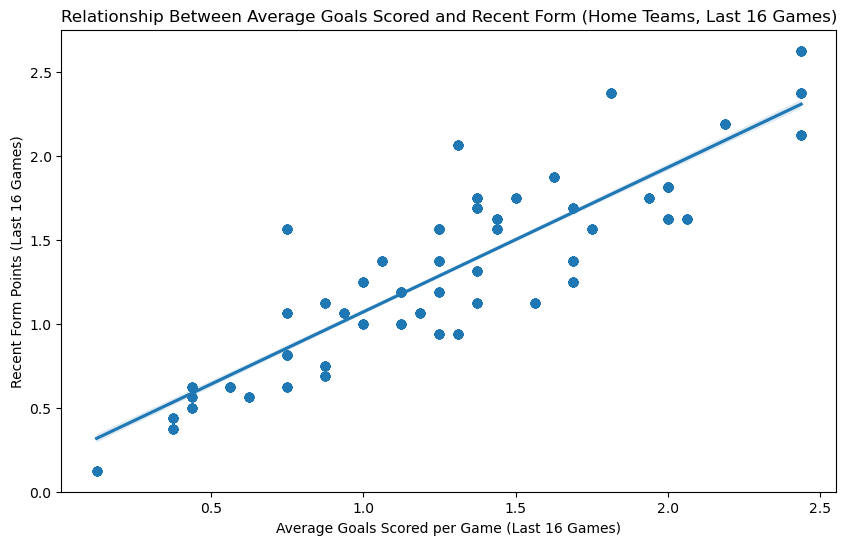

Pearson Correlation Coefficient (Home Teams): 0.8794965758766141


In [96]:
# Scatter plot with a regression line for average goals scored vs recent form for home teams
plt.figure(figsize=(10, 6))
sns.regplot(x='Home Team Avg Goals Last 16', y='Home Team Recent Form 16', data=df, scatter_kws={'alpha':0.5})
plt.title('Relationship Between Average Goals Scored and Recent Form (Home Teams, Last 16 Games)')
plt.xlabel('Average Goals Scored per Game (Last 16 Games)')
plt.ylabel('Recent Form Points (Last 16 Games)')
plt.show()

# Calculate and display the Pearson correlation coefficient for home teams
correlation_home = df['Home Team Avg Goals Last 16'].corr(df['Home Team Recent Form 16'])
print("Pearson Correlation Coefficient (Home Teams):", correlation_home)

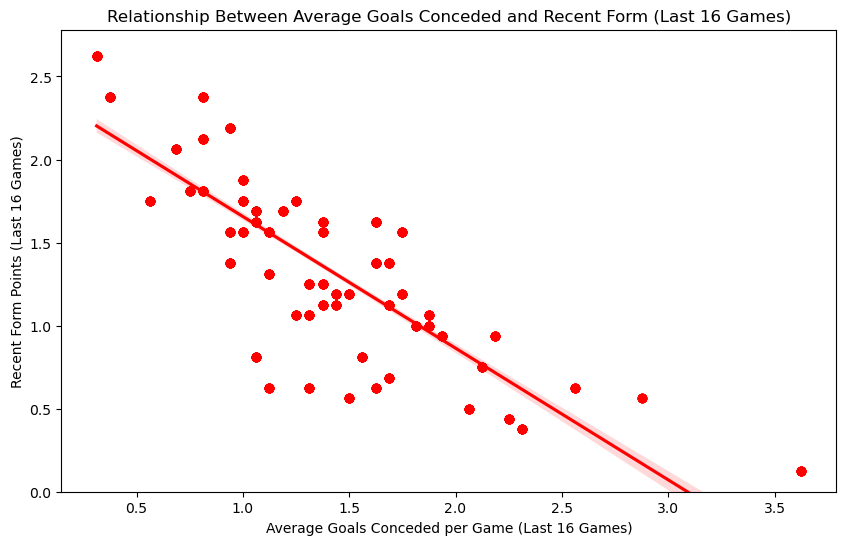

Pearson Correlation Coefficient: -0.8000880728661649


In [97]:
plt.figure(figsize=(10, 6))
ax = sns.regplot(x='Home Team Avg Goals Conceded Last 16', y='Home Team Recent Form 16', data=df, scatter_kws={'alpha':0.5}, color='red')
ax.set_ylim(bottom=0)  # Setting the y-axis to start at 0
plt.title('Relationship Between Average Goals Conceded and Recent Form (Last 16 Games)')
plt.xlabel('Average Goals Conceded per Game (Last 16 Games)')
plt.ylabel('Recent Form Points (Last 16 Games)')
plt.show()

# Calculate and display the Pearson correlation coefficient
correlation_conceded = df['Home Team Avg Goals Conceded Last 16'].corr(df['Home Team Recent Form 16'])
print("Pearson Correlation Coefficient:", correlation_conceded)

In [98]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'neutral', 'home_total_points', 'home_rank',
       'away_total_points', 'away_rank', 'is_friendly',
       'Home Team Recent Form 16', 'Home Team Recent Form 4',
       'Away Team Recent Form 16', 'Away Team Recent Form 4',
       'Home Team Avg Goals Last 16', 'Away Team Avg Goals Last 16',
       'Home Team Avg Goals Last 4', 'Away Team Avg Goals Last 4',
       'Home Team Avg Goals Conceded Last 16',
       'Away Team Avg Goals Conceded Last 16',
       'Home Team Avg Goals Conceded Last 4',
       'Away Team Avg Goals Conceded Last 4',
       'Home Team Overall Goal Difference',
       'Away Team Overall Goal Difference'],
      dtype='object')

In [99]:
df

,date,home_team,away_team,home_score,away_score,tournament,neutral,home_total_points,home_rank,away_total_points,...,Home Team Avg Goals Last 16,Away Team Avg Goals Last 16,Home Team Avg Goals Last 4,Away Team Avg Goals Last 4,Home Team Avg Goals Conceded Last 16,Away Team Avg Goals Conceded Last 16,Home Team Avg Goals Conceded Last 4,Away Team Avg Goals Conceded Last 4,Home Team Overall Goal Difference,Away Team Overall Goal Difference
0,2016-08-31,Albania,Morocco,0,0,Friendly,False,739.00,37.0,574.00,...,1.2500,NaN,0.75,NaN,0.9375,NaN,1.25,NaN,-0.244444,0.111111
1,2016-08-31,Czech Republic,Armenia,3,0,Friendly,False,768.00,34.0,348.00,...,1.4375,1.4375,1.00,1.75,1.0625,1.7500,1.00,1.50,0.277778,-0.363636
2,2016-08-31,Denmark,Liechtenstein,5,0,Friendly,False,630.00,44.0,89.00,...,2.4375,0.5625,2.75,0.50,0.8125,2.5625,1.00,5.25,1.271186,-2.404762
3,2016-08-31,Estonia,Malta,1,1,Friendly,False,323.00,117.0,109.00,...,0.8750,1.1250,1.00,0.75,2.1250,1.8125,0.50,2.50,-0.945455,-1.446809
4,2016-08-31,Germany,Finland,2,0,Friendly,False,1319.00,4.0,540.00,...,2.0000,1.0000,1.50,0.25,1.6250,1.3750,1.75,1.00,1.229508,0.111111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,2021-07-03,Czech Republic,Denmark,1,2,UEFA Euro,True,1458.81,40.0,1631.55,...,1.4375,2.4375,1.00,2.75,1.0625,0.8125,1.00,1.00,0.277778,1.271186
1480,2021-07-03,Ukraine,England,0,4,UEFA Euro,True,1514.64,24.0,1686.78,...,1.1250,1.8125,1.00,2.25,1.5000,0.3750,1.75,0.50,0.173077,1.338710
1481,2021-07-06,Italy,Spain,1,1,UEFA Euro,True,1642.06,7.0,1648.13,...,2.4375,2.0000,1.50,3.00,0.3125,0.7500,1.00,1.25,1.620690,1.830508
1482,2021-07-07,England,Denmark,2,1,UEFA Euro,False,1686.78,4.0,1631.55,...,1.8125,2.4375,2.25,2.75,0.3750,0.8125,0.50,1.00,1.338710,1.271186


In [100]:
def calculate_h2h_stats(df, team1, team2, date):
    # Filter for matches between the two teams that occurred before the match_date
    historical_matches = df[((df['home_team'] == team1) & (df['away_team'] == team2) |
                             (df['home_team'] == team2) & (df['away_team'] == team1)) &
                            (df['date'] < date)]

    if historical_matches.empty:
        return 0  # No historical matches

    # Calculate the outcomes from historical matches
    historical_matches['match_outcome'] = 0  # Default to draw
    historical_matches.loc[(historical_matches['home_team'] == team1) & (historical_matches['home_score'] > historical_matches['away_score']), 'match_outcome'] = 1
    historical_matches.loc[(historical_matches['away_team'] == team1) & (historical_matches['away_score'] > historical_matches['home_score']), 'match_outcome'] = 1
    historical_matches.loc[(historical_matches['away_team'] == team1) & (historical_matches['home_score'] > historical_matches['away_score']), 'match_outcome'] = -1
    historical_matches.loc[(historical_matches['home_team'] == team1) & (historical_matches['away_score'] > historical_matches['home_score']), 'match_outcome'] = -1

    return historical_matches['match_outcome'].mean()

In [101]:
df['H2H_Historical_Outcome'] = df.apply(lambda x: calculate_h2h_stats(df, x['home_team'], x['away_team'], x['date']), axis=1)

In [102]:
# Count the frequency of each matchup
matchup_counts = df.groupby(['home_team', 'away_team']).size()

# Find the most frequent matchup
most_frequent_matchup = matchup_counts.idxmax()
print("Most frequent matchup:", most_frequent_matchup)

Most frequent matchup: ('Andorra', 'Latvia')


In [103]:
# Filter the DataFrame for the most frequent matchup
most_frequent_games = df[(df['home_team'] == most_frequent_matchup[0]) & (df['away_team'] == most_frequent_matchup[1]) |
                         (df['home_team'] == most_frequent_matchup[1]) & (df['away_team'] == most_frequent_matchup[0])]

# Determine the outcome of each match
most_frequent_games['outcome'] = most_frequent_games.apply(lambda row: 1 if row['home_score'] > row['away_score']
                                                           else -1 if row['away_score'] > row['home_score']
                                                           else 0, axis=1)

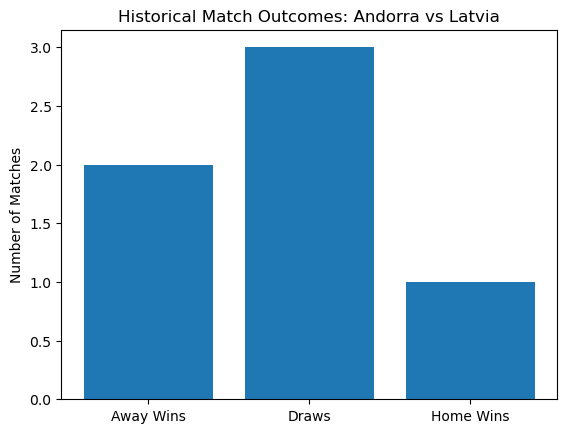

In [104]:
import matplotlib.pyplot as plt

# Assuming the rest of your code is correct and 'most_frequent_games' is defined properly

# Create a bar chart for the outcomes
outcome_counts = most_frequent_games['outcome'].value_counts().sort_index()

# Prepare the labels and counts, considering only the outcomes present in the data
outcome_labels = []
counts = []

if -1 in outcome_counts:
    outcome_labels.append('Away Wins')
    counts.append(outcome_counts[-1])

if 0 in outcome_counts:
    outcome_labels.append('Draws')
    counts.append(outcome_counts[0])

if 1 in outcome_counts:
    outcome_labels.append('Home Wins')
    counts.append(outcome_counts[1])

plt.bar(outcome_labels, counts)
plt.title(f'Historical Match Outcomes: {most_frequent_matchup[0]} vs {most_frequent_matchup[1]}')
plt.ylabel('Number of Matches')
plt.show()


In [105]:
df

,date,home_team,away_team,home_score,away_score,tournament,neutral,home_total_points,home_rank,away_total_points,...,Away Team Avg Goals Last 16,Home Team Avg Goals Last 4,Away Team Avg Goals Last 4,Home Team Avg Goals Conceded Last 16,Away Team Avg Goals Conceded Last 16,Home Team Avg Goals Conceded Last 4,Away Team Avg Goals Conceded Last 4,Home Team Overall Goal Difference,Away Team Overall Goal Difference,H2H_Historical_Outcome
0,2016-08-31,Albania,Morocco,0,0,Friendly,False,739.00,37.0,574.00,...,NaN,0.75,NaN,0.9375,NaN,1.25,NaN,-0.244444,0.111111,0.0
1,2016-08-31,Czech Republic,Armenia,3,0,Friendly,False,768.00,34.0,348.00,...,1.4375,1.00,1.75,1.0625,1.7500,1.00,1.50,0.277778,-0.363636,0.0
2,2016-08-31,Denmark,Liechtenstein,5,0,Friendly,False,630.00,44.0,89.00,...,0.5625,2.75,0.50,0.8125,2.5625,1.00,5.25,1.271186,-2.404762,0.0
3,2016-08-31,Estonia,Malta,1,1,Friendly,False,323.00,117.0,109.00,...,1.1250,1.00,0.75,2.1250,1.8125,0.50,2.50,-0.945455,-1.446809,0.0
4,2016-08-31,Germany,Finland,2,0,Friendly,False,1319.00,4.0,540.00,...,1.0000,1.50,0.25,1.6250,1.3750,1.75,1.00,1.229508,0.111111,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,2021-07-03,Czech Republic,Denmark,1,2,UEFA Euro,True,1458.81,40.0,1631.55,...,2.4375,1.00,2.75,1.0625,0.8125,1.00,1.00,0.277778,1.271186,0.0
1480,2021-07-03,Ukraine,England,0,4,UEFA Euro,True,1514.64,24.0,1686.78,...,1.8125,1.00,2.25,1.5000,0.3750,1.75,0.50,0.173077,1.338710,0.0
1481,2021-07-06,Italy,Spain,1,1,UEFA Euro,True,1642.06,7.0,1648.13,...,2.0000,1.50,3.00,0.3125,0.7500,1.00,1.25,1.620690,1.830508,-0.5
1482,2021-07-07,England,Denmark,2,1,UEFA Euro,False,1686.78,4.0,1631.55,...,2.4375,2.25,2.75,0.3750,0.8125,0.50,1.00,1.338710,1.271186,-0.5


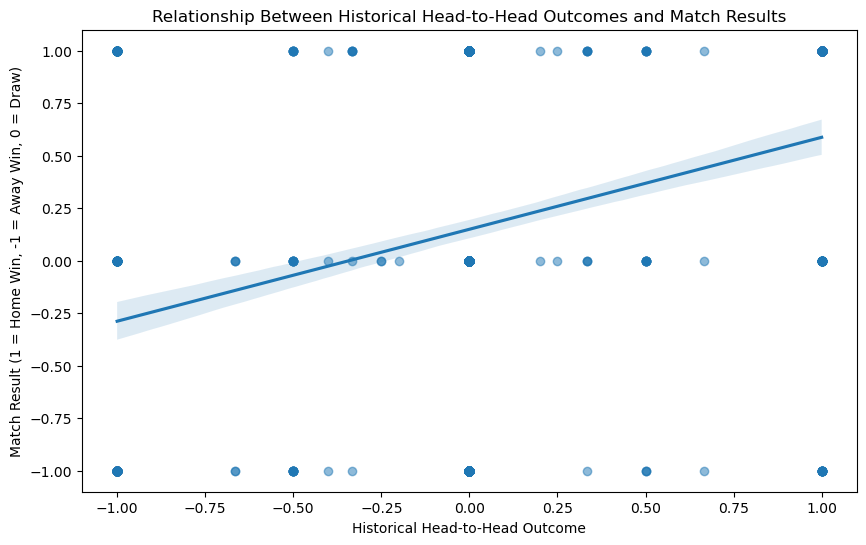

Pearson Correlation Coefficient: 0.2606599277636304


In [106]:
# Calculate match results temporarily for the plot
match_results = df.apply(lambda x: 1 if x['home_score'] > x['away_score']
                         else -1 if x['away_score'] > x['home_score']
                         else 0, axis=1)

plt.figure(figsize=(10, 6))
sns.regplot(x=df['H2H_Historical_Outcome'], y=match_results, scatter_kws={'alpha':0.5})
plt.title('Relationship Between Historical Head-to-Head Outcomes and Match Results')
plt.xlabel('Historical Head-to-Head Outcome')
plt.ylabel('Match Result (1 = Home Win, -1 = Away Win, 0 = Draw)')
plt.show()

# Calculate and display the Pearson correlation coefficient
correlation = df['H2H_Historical_Outcome'].corr(match_results)
print("Pearson Correlation Coefficient:", correlation)


In [107]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'neutral', 'home_total_points', 'home_rank',
       'away_total_points', 'away_rank', 'is_friendly',
       'Home Team Recent Form 16', 'Home Team Recent Form 4',
       'Away Team Recent Form 16', 'Away Team Recent Form 4',
       'Home Team Avg Goals Last 16', 'Away Team Avg Goals Last 16',
       'Home Team Avg Goals Last 4', 'Away Team Avg Goals Last 4',
       'Home Team Avg Goals Conceded Last 16',
       'Away Team Avg Goals Conceded Last 16',
       'Home Team Avg Goals Conceded Last 4',
       'Away Team Avg Goals Conceded Last 4',
       'Home Team Overall Goal Difference',
       'Away Team Overall Goal Difference', 'H2H_Historical_Outcome'],
      dtype='object')

In [108]:
df['Match_Outcome'] = df.apply(lambda row: 'Win' if row['home_score'] > row['away_score']
                               else 'Loss' if row['home_score'] < row['away_score']
                               else 'Draw', axis=1)

In [109]:
def calculate_weighted_stats(df, stat_type, team_type, rank_column):
    """
    Calculate weighted statistics relative to the opponent's FIFA rank.

    :param df: DataFrame containing the match data.
    :param stat_type: Type of statistic ('recent_form', 'goals_scored', 'goals_conceded').
    :param team_type: 'home' or 'away' to specify the team's type.
    :param rank_column: Column name for the opponent's FIFA rank.
    :return: Weighted statistic for the given type.
    """
    # Define the base column names
    base_columns = {
        'recent_form': f'{team_type.capitalize()} Team Recent Form 16',
        'goals_scored': f'{team_type.capitalize()} Team Avg Goals Last 16',
        'goals_conceded': f'{team_type.capitalize()} Team Avg Goals Conceded Last 16'
    }

    # Get the correct column name for the stat
    stat_column = base_columns.get(stat_type)

    # Invert the FIFA rank (higher rank means a stronger opponent, so invert it for weighting)
    inverted_ranks = 1 / df[rank_column].replace(0, np.nan)

    # Calculate the weighted stat
    weighted_stat = df[stat_column] * inverted_ranks
    return weighted_stat.fillna(0)  # Replace NaN values with 0

# Columns for the opponent's FIFA rank for home and away teams
home_rank_column = 'away_rank'
away_rank_column = 'home_rank'

# Apply the function to calculate all the weighted stats
df['Home Team Recent Form 16 Relative to Rank'] = calculate_weighted_stats(df, 'recent_form', 'home', home_rank_column)
df['Away Team Recent Form 16 Relative to Rank'] = calculate_weighted_stats(df, 'recent_form', 'away', away_rank_column)
df['Home Team Goals Scored Last 16 Relative to Rank'] = calculate_weighted_stats(df, 'goals_scored', 'home', home_rank_column)
df['Home Team Goals Conceded Last 16 Relative to Rank'] = calculate_weighted_stats(df, 'goals_conceded', 'home', home_rank_column)
df['Away Team Goals Scored Last 16 Relative to Rank'] = calculate_weighted_stats(df, 'goals_scored', 'away', away_rank_column)
df['Away Team Goals Conceded Last 16 Relative to Rank'] = calculate_weighted_stats(df, 'goals_conceded', 'away', away_rank_column)


In [110]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'neutral', 'home_total_points', 'home_rank',
       'away_total_points', 'away_rank', 'is_friendly',
       'Home Team Recent Form 16', 'Home Team Recent Form 4',
       'Away Team Recent Form 16', 'Away Team Recent Form 4',
       'Home Team Avg Goals Last 16', 'Away Team Avg Goals Last 16',
       'Home Team Avg Goals Last 4', 'Away Team Avg Goals Last 4',
       'Home Team Avg Goals Conceded Last 16',
       'Away Team Avg Goals Conceded Last 16',
       'Home Team Avg Goals Conceded Last 4',
       'Away Team Avg Goals Conceded Last 4',
       'Home Team Overall Goal Difference',
       'Away Team Overall Goal Difference', 'H2H_Historical_Outcome',
       'Match_Outcome', 'Home Team Recent Form 16 Relative to Rank',
       'Away Team Recent Form 16 Relative to Rank',
       'Home Team Goals Scored Last 16 Relative to Rank',
       'Home Team Goals Conceded Last 16 Relative to Rank',
       'Aw

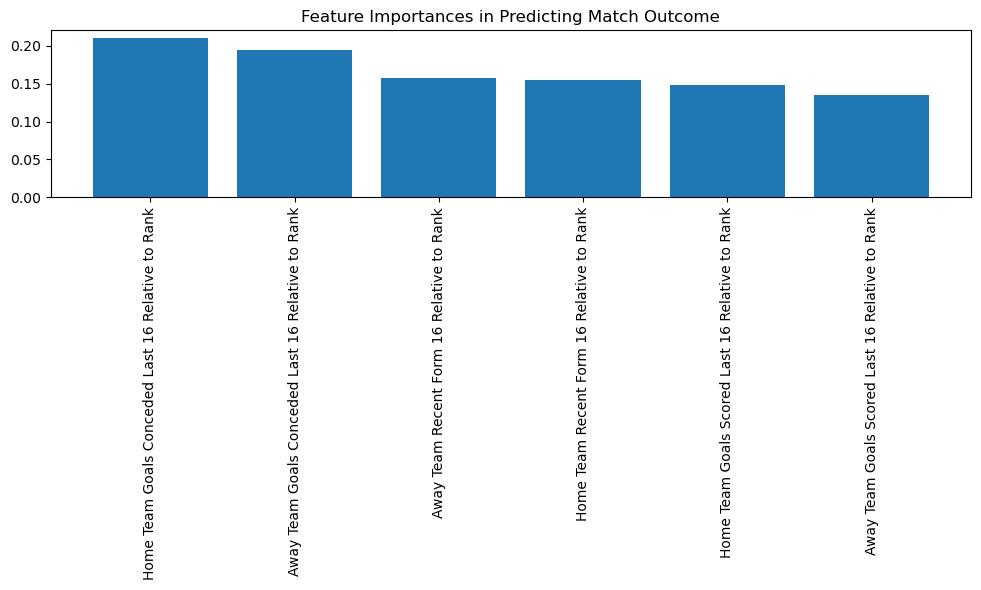

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Prepare the features and target variable
X = df[['Home Team Recent Form 16 Relative to Rank',
        'Away Team Recent Form 16 Relative to Rank',
        'Home Team Goals Scored Last 16 Relative to Rank',
        'Home Team Goals Conceded Last 16 Relative to Rank',
        'Away Team Goals Scored Last 16 Relative to Rank',
        'Away Team Goals Conceded Last 16 Relative to Rank']]

# Encode the categorical Match_Outcome
le = LabelEncoder()
y = le.fit_transform(df['Match_Outcome'])

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Plot the feature importances
importances = model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances in Predicting Match Outcome')
plt.bar(range(X.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [112]:
df.tail()

,date,home_team,away_team,home_score,away_score,tournament,neutral,home_total_points,home_rank,away_total_points,...,Home Team Overall Goal Difference,Away Team Overall Goal Difference,H2H_Historical_Outcome,Match_Outcome,Home Team Recent Form 16 Relative to Rank,Away Team Recent Form 16 Relative to Rank,Home Team Goals Scored Last 16 Relative to Rank,Home Team Goals Conceded Last 16 Relative to Rank,Away Team Goals Scored Last 16 Relative to Rank,Away Team Goals Conceded Last 16 Relative to Rank
1479,2021-07-03,Czech Republic,Denmark,1,2,UEFA Euro,True,1458.81,40.0,1631.55,...,0.277778,1.271186,0.0,Loss,0.162500,0.053125,0.143750,0.106250,0.060938,0.020313
1480,2021-07-03,Ukraine,England,0,4,UEFA Euro,True,1514.64,24.0,1686.78,...,0.173077,1.338710,0.0,Loss,0.296875,0.098958,0.281250,0.375000,0.075521,0.015625
1481,2021-07-06,Italy,Spain,1,1,UEFA Euro,True,1642.06,7.0,1648.13,...,1.620690,1.830508,-0.5,Draw,0.437500,0.258929,0.406250,0.052083,0.285714,0.107143
1482,2021-07-07,England,Denmark,2,1,UEFA Euro,False,1686.78,4.0,1631.55,...,1.338710,1.271186,-0.5,Win,0.237500,0.531250,0.181250,0.037500,0.609375,0.203125
1483,2021-07-11,England,Italy,1,1,UEFA Euro,False,1686.78,4.0,1642.06,...,1.338710,1.620690,0.0,Draw,0.339286,0.656250,0.258929,0.053571,0.609375,0.078125


In [113]:
df_home = df[['date', 'home_team', 'home_score', 'home_total_points', 'home_rank', 'Home Team Recent Form 16', 'Home Team Recent Form 4',
              'Home Team Avg Goals Last 16', 'Home Team Avg Goals Last 4', 'Home Team Avg Goals Conceded Last 16', 'Home Team Avg Goals Conceded Last 4',
              'Home Team Overall Goal Difference', 'Home Team Recent Form 16 Relative to Rank', 'Home Team Goals Scored Last 16 Relative to Rank', 'Home Team Goals Conceded Last 16 Relative to Rank']]

df_home.tail()

,date,home_team,home_score,home_total_points,home_rank,Home Team Recent Form 16,Home Team Recent Form 4,Home Team Avg Goals Last 16,Home Team Avg Goals Last 4,Home Team Avg Goals Conceded Last 16,Home Team Avg Goals Conceded Last 4,Home Team Overall Goal Difference,Home Team Recent Form 16 Relative to Rank,Home Team Goals Scored Last 16 Relative to Rank,Home Team Goals Conceded Last 16 Relative to Rank
1479,2021-07-03,Czech Republic,1,1458.81,40.0,1.6250,1.0,1.4375,1.00,1.0625,1.00,0.277778,0.162500,0.143750,0.106250
1480,2021-07-03,Ukraine,0,1514.64,24.0,1.1875,1.5,1.1250,1.00,1.5000,1.75,0.173077,0.296875,0.281250,0.375000
1481,2021-07-06,Italy,1,1642.06,7.0,2.6250,2.0,2.4375,1.50,0.3125,1.00,1.620690,0.437500,0.406250,0.052083
1482,2021-07-07,England,2,1686.78,4.0,2.3750,2.5,1.8125,2.25,0.3750,0.50,1.338710,0.237500,0.181250,0.037500
1483,2021-07-11,England,1,1686.78,4.0,2.3750,2.5,1.8125,2.25,0.3750,0.50,1.338710,0.339286,0.258929,0.053571


In [114]:
df_away = df[['date', 'away_team', 'away_score', 'away_total_points', 'away_rank', 'Away Team Recent Form 16', 'Away Team Recent Form 4',
              'Away Team Avg Goals Last 16', 'Away Team Avg Goals Last 4', 'Away Team Avg Goals Conceded Last 16', 'Away Team Avg Goals Conceded Last 4',
              'Away Team Overall Goal Difference', 'Away Team Recent Form 16 Relative to Rank', 'Away Team Goals Scored Last 16 Relative to Rank', 'Away Team Goals Conceded Last 16 Relative to Rank']]

In [115]:
df_home.columns = ['date', 'team', 'score', 'total_points', 'rank', 'Team Recent Form 16', 'Team Recent Form 4', 'Team Avg Goals Last 16', 'Team Avg Goals Last 4',
                   'Team Avg Goals Conceded Last 16', 'Team Avg Goals Conceded Last 4', 'Team Overall Goal Difference', 'Team Recent Form 16 Relative to Rank',
                   'Team Goals Scored Last 16 Relative to Rank', 'Team Goals Conceded Last 16 Relative to Rank']

In [116]:
df_away.columns = ['date', 'team', 'score', 'total_points', 'rank', 'Team Recent Form 30', 'Team Recent Form 4', 'Team Avg Goals Last 16', 'Team Avg Goals Last 4',
                   'Team Avg Goals Conceded Last 16', 'Team Avg Goals Conceded Last 4', 'Team Overall Goal Difference', 'Team Recent Form 16 Relative to Rank',
                   'Team Goals Scored Last 16 Relative to Rank', 'Team Goals Conceded Last 16 Relative to Rank']

In [117]:
df_team_stats = pd.concat([df_home, df_away])

df_team_stats.sort_values(by=['date', 'team'], inplace=True)
df_latest_team_stats = df_team_stats.drop_duplicates(subset='team', keep='last')

df_latest_team_stats

,date,team,score,total_points,rank,Team Recent Form 16,Team Recent Form 4,Team Avg Goals Last 16,Team Avg Goals Last 4,Team Avg Goals Conceded Last 16,Team Avg Goals Conceded Last 4,Team Overall Goal Difference,Team Recent Form 16 Relative to Rank,Team Goals Scored Last 16 Relative to Rank,Team Goals Conceded Last 16 Relative to Rank,Team Recent Form 30
5,2016-08-31,Oman,0,340.00,107.0,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0000
131,2016-11-22,Antigua and Barbuda,0,435.00,82.0,0.0000,0.00,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN
244,2017-06-25,Cameroon,1,811.00,32.0,NaN,0.00,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.0000
402,2017-11-18,Fiji,0,95.00,175.0,0.0000,0.00,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN
403,2017-11-22,Vanuatu,0,51.00,188.0,0.0000,0.00,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,2021-07-03,Ukraine,0,1514.64,24.0,1.1875,1.50,1.1250,1.00,1.5000,1.75,0.173077,0.296875,0.281250,0.375000,NaN
1481,2021-07-06,Spain,1,1648.13,6.0,NaN,2.00,2.0000,3.00,0.7500,1.25,1.830508,0.258929,0.285714,0.107143,1.8125
1482,2021-07-07,Denmark,1,1631.55,10.0,NaN,2.25,2.4375,2.75,0.8125,1.00,1.271186,0.531250,0.609375,0.203125,2.1250
1483,2021-07-11,England,1,1686.78,4.0,2.3750,2.50,1.8125,2.25,0.3750,0.50,1.338710,0.339286,0.258929,0.053571,NaN


In [118]:
df_latest_team_stats.columns

Index(['date', 'team', 'score', 'total_points', 'rank', 'Team Recent Form 16',
       'Team Recent Form 4', 'Team Avg Goals Last 16', 'Team Avg Goals Last 4',
       'Team Avg Goals Conceded Last 16', 'Team Avg Goals Conceded Last 4',
       'Team Overall Goal Difference', 'Team Recent Form 16 Relative to Rank',
       'Team Goals Scored Last 16 Relative to Rank',
       'Team Goals Conceded Last 16 Relative to Rank', 'Team Recent Form 30'],
      dtype='object')

In [119]:
df_latest_team_stats.dtypes

date                                            datetime64[ns]
team                                                    object
score                                                    int64
total_points                                           float64
rank                                                   float64
Team Recent Form 16                                    float64
Team Recent Form 4                                     float64
Team Avg Goals Last 16                                 float64
Team Avg Goals Last 4                                  float64
Team Avg Goals Conceded Last 16                        float64
Team Avg Goals Conceded Last 4                         float64
Team Overall Goal Difference                           float64
Team Recent Form 16 Relative to Rank                   float64
Team Goals Scored Last 16 Relative to Rank             float64
Team Goals Conceded Last 16 Relative to Rank           float64
Team Recent Form 30                                    

In [120]:
# Define a mapping from categorical outcomes to numeric values
outcome_mapping = {'Win': 1, 'Loss': -1, 'Draw': 0}

# Create a new column with numeric outcomes
df['Numeric_Outcome'] = df['Match_Outcome'].map(outcome_mapping)

In [121]:
# Find the position of the original Match_Outcome column
outcome_col_index = df.columns.get_loc('Match_Outcome')

# Insert the Numeric_Outcome column next to Match_Outcome
df.insert(outcome_col_index + 1, 'Numeric_Outcome', df.pop('Numeric_Outcome'))

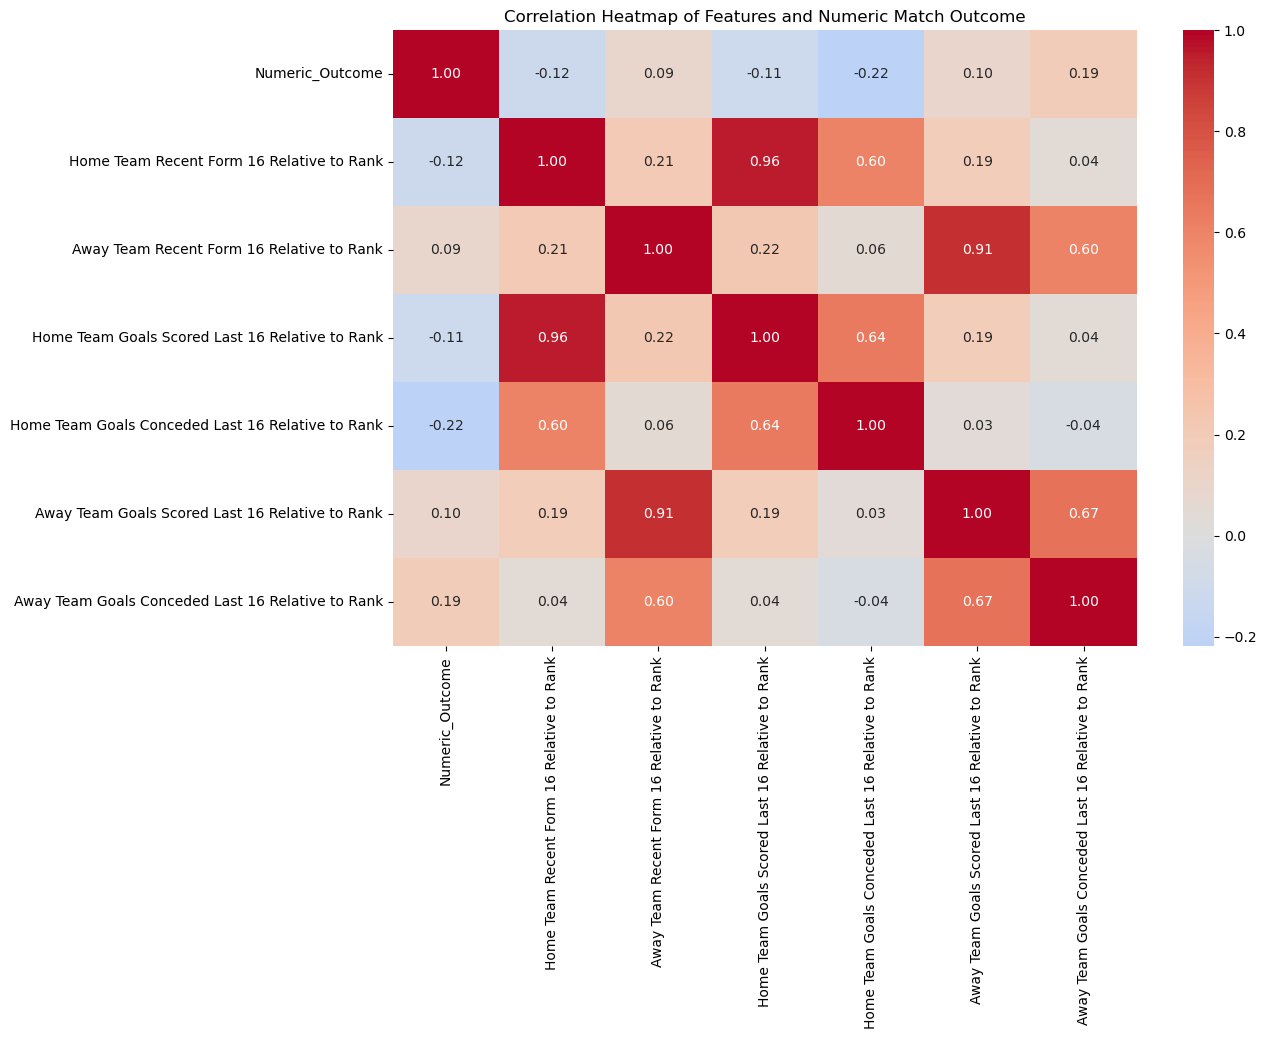

In [122]:
# Calculate the correlation matrix including the new Numeric_Outcome
corr_columns = [
    'Numeric_Outcome', 'Home Team Recent Form 16 Relative to Rank',
    'Away Team Recent Form 16 Relative to Rank', 'Home Team Goals Scored Last 16 Relative to Rank',
    'Home Team Goals Conceded Last 16 Relative to Rank', 'Away Team Goals Scored Last 16 Relative to Rank',
    'Away Team Goals Conceded Last 16 Relative to Rank'
]
corr_matrix = df[corr_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Features and Numeric Match Outcome')
plt.show()

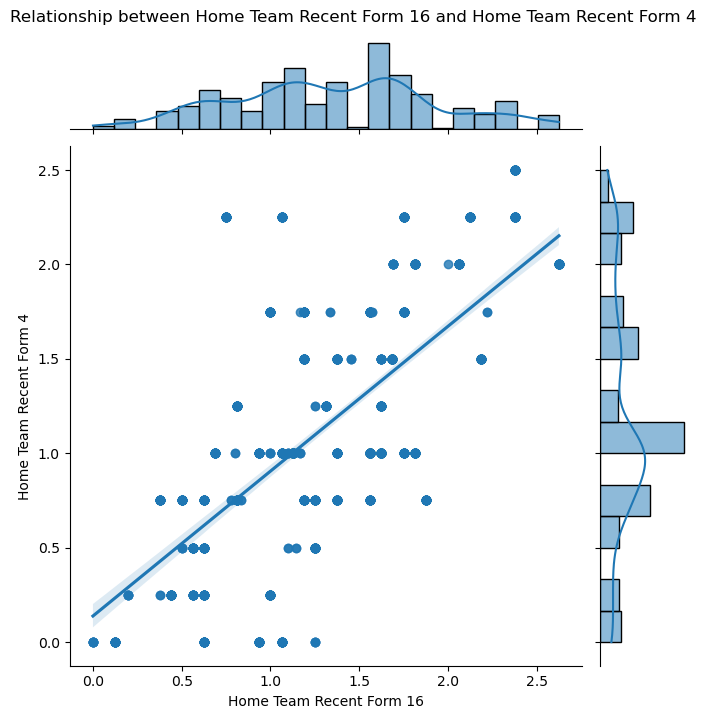

In [123]:
sns.jointplot(x='Home Team Recent Form 16', y='Home Team Recent Form 4', data=df, kind="reg", height=7)
plt.xlabel('Home Team Recent Form 16')
plt.ylabel('Home Team Recent Form 4')
plt.suptitle('Relationship between Home Team Recent Form 16 and Home Team Recent Form 4', y=1.02)
plt.show()

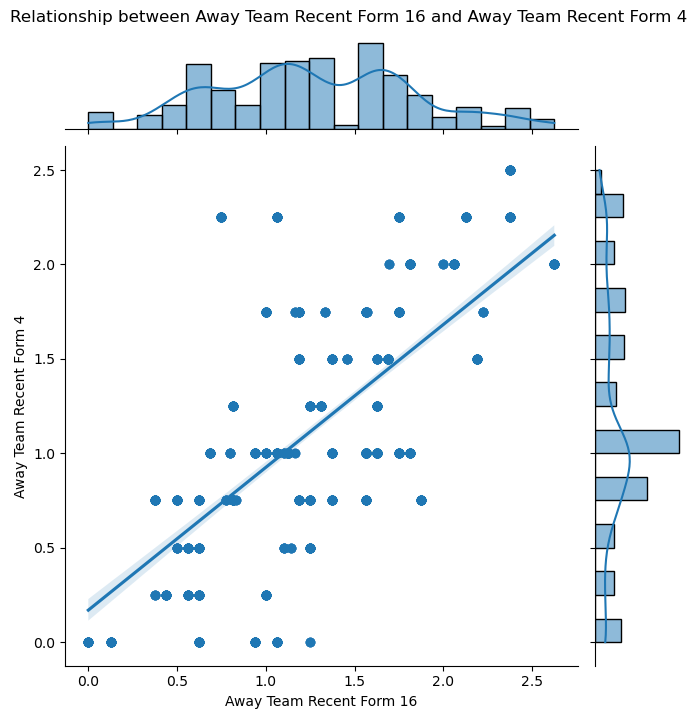

In [124]:
sns.jointplot(x='Away Team Recent Form 16', y='Away Team Recent Form 4', data=df, kind="reg", height=7)
plt.xlabel('Away Team Recent Form 16')
plt.ylabel('Away Team Recent Form 4')
plt.suptitle('Relationship between Away Team Recent Form 16 and Away Team Recent Form 4', y=1.02)
plt.show()

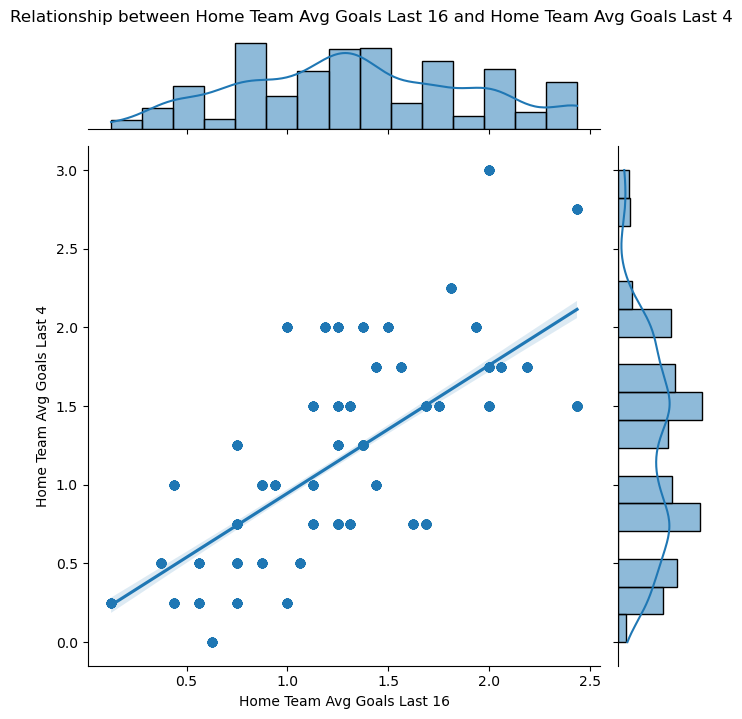

In [125]:
sns.jointplot(x='Home Team Avg Goals Last 16', y='Home Team Avg Goals Last 4', data=df, kind="reg", height=7)
plt.xlabel('Home Team Avg Goals Last 16')
plt.ylabel('Home Team Avg Goals Last 4')
plt.suptitle('Relationship between Home Team Avg Goals Last 16 and Home Team Avg Goals Last 4', y=1.02)
plt.show()

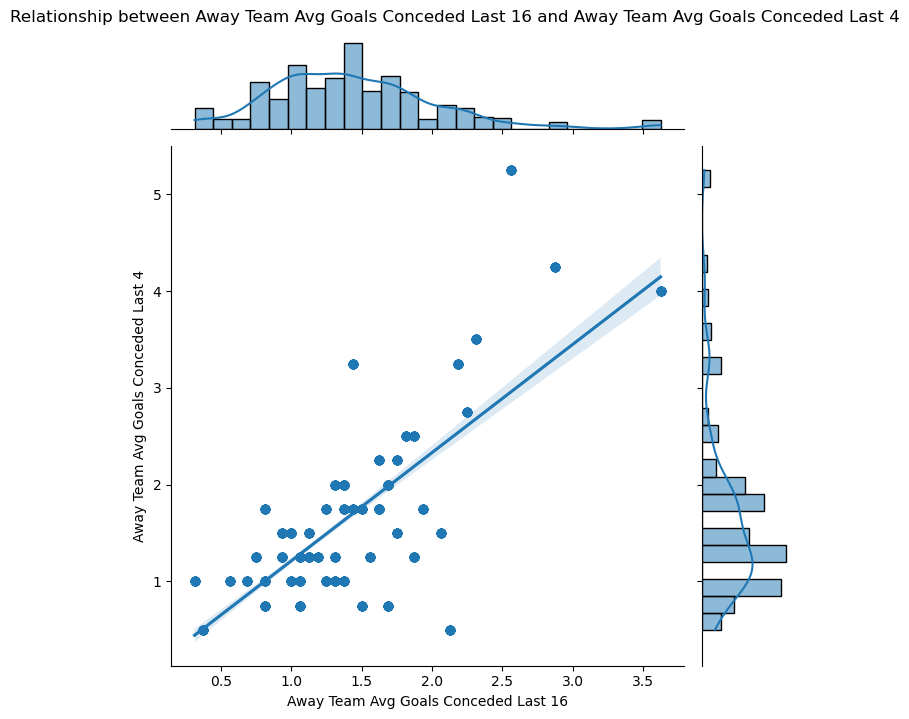

In [126]:
sns.jointplot(x='Away Team Avg Goals Conceded Last 16', y='Away Team Avg Goals Conceded Last 4', data=df, kind="reg", height=7)
plt.xlabel('Away Team Avg Goals Conceded Last 16')
plt.ylabel('Away Team Avg Goals Conceded Last 4')
plt.suptitle('Relationship between Away Team Avg Goals Conceded Last 16 and Away Team Avg Goals Conceded Last 4', y=1.02)
plt.show()

In [131]:
df.dtypes
df

,date,home_team,away_team,home_score,away_score,tournament,neutral,home_total_points,home_rank,away_total_points,...,Away Team Overall Goal Difference,H2H_Historical_Outcome,Match_Outcome,Numeric_Outcome,Home Team Recent Form 16 Relative to Rank,Away Team Recent Form 16 Relative to Rank,Home Team Goals Scored Last 16 Relative to Rank,Home Team Goals Conceded Last 16 Relative to Rank,Away Team Goals Scored Last 16 Relative to Rank,Away Team Goals Conceded Last 16 Relative to Rank
0,2016-08-31,Albania,Morocco,0,0,Friendly,False,739.00,37.0,574.00,...,0.111111,0.0,Draw,0,0.029481,0.036036,0.023585,0.017689,0.000000,0.000000
1,2016-08-31,Czech Republic,Armenia,3,0,Friendly,False,768.00,34.0,348.00,...,-0.363636,0.0,Win,1,0.015931,0.045956,0.014093,0.010417,0.042279,0.051471
2,2016-08-31,Denmark,Liechtenstein,5,0,Friendly,False,630.00,44.0,89.00,...,-2.404762,0.0,Win,1,0.011676,0.014205,0.013393,0.004464,0.012784,0.058239
3,2016-08-31,Estonia,Malta,1,1,Friendly,False,323.00,117.0,109.00,...,-1.446809,0.0,Draw,0,0.004261,0.008547,0.004972,0.012074,0.009615,0.015491
4,2016-08-31,Germany,Finland,2,0,Friendly,False,1319.00,4.0,540.00,...,0.111111,0.0,Win,1,0.026639,0.312500,0.032787,0.026639,0.250000,0.343750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,2021-07-03,Czech Republic,Denmark,1,2,UEFA Euro,True,1458.81,40.0,1631.55,...,1.271186,0.0,Loss,-1,0.162500,0.053125,0.143750,0.106250,0.060938,0.020313
1480,2021-07-03,Ukraine,England,0,4,UEFA Euro,True,1514.64,24.0,1686.78,...,1.338710,0.0,Loss,-1,0.296875,0.098958,0.281250,0.375000,0.075521,0.015625
1481,2021-07-06,Italy,Spain,1,1,UEFA Euro,True,1642.06,7.0,1648.13,...,1.830508,-0.5,Draw,0,0.437500,0.258929,0.406250,0.052083,0.285714,0.107143
1482,2021-07-07,England,Denmark,2,1,UEFA Euro,False,1686.78,4.0,1631.55,...,1.271186,-0.5,Win,1,0.237500,0.531250,0.181250,0.037500,0.609375,0.203125


In [133]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for the numeric columns
correlations = numeric_df.corr()

if 'Numeric_Outcome' in correlations:
    specific_correlations = correlations['Numeric_Outcome'].sort_values(ascending=False)
    # To display the correlations
    print(specific_correlations)
else:
    print("Column 'Numeric_Outcome' not found in numeric columns")

Numeric_Outcome                                      1.000000
home_score                                           0.634618
Home Team Overall Goal Difference                    0.380758
Home Team Recent Form 16                             0.331712
Home Team Avg Goals Last 16                          0.328097
away_rank                                            0.310005
Away Team Avg Goals Conceded Last 16                 0.296858
H2H_Historical_Outcome                               0.260660
Home Team Recent Form 4                              0.240395
home_total_points                                    0.234999
Away Team Avg Goals Conceded Last 4                  0.227950
Home Team Avg Goals Last 4                           0.225249
Away Team Goals Conceded Last 16 Relative to Rank    0.194879
Away Team Goals Scored Last 16 Relative to Rank      0.100791
Away Team Recent Form 16 Relative to Rank            0.094903
is_friendly                                          0.030275
Home Tea

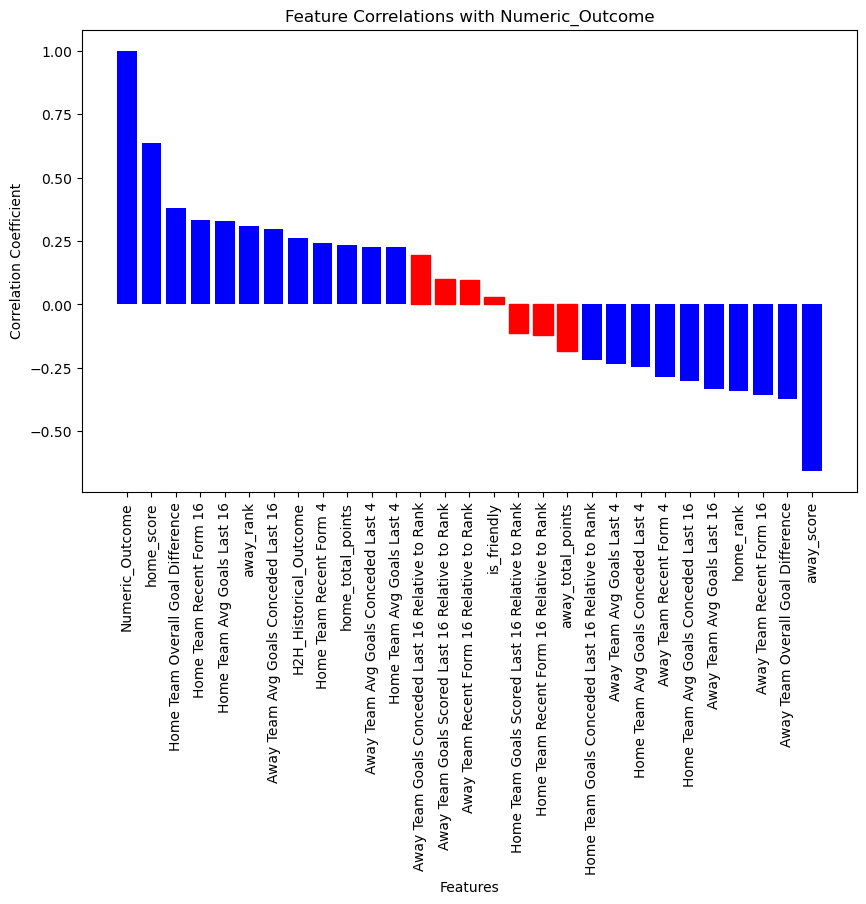

In [134]:
upper_threshold = 0.2
lower_threshold = -0.2

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(specific_correlations.index, specific_correlations.values, color='blue')

# Highlight bars outside the threshold range
for bar, value in zip(bars, specific_correlations.values):
    if value < upper_threshold and value > lower_threshold:
        bar.set_color('red')

# Adding labels and title
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.title('Feature Correlations with Numeric_Outcome')
plt.xticks(rotation=90)  # Rotate feature names for readability

# Show the plot
plt.show()

In [135]:
df

,date,home_team,away_team,home_score,away_score,tournament,neutral,home_total_points,home_rank,away_total_points,...,Away Team Overall Goal Difference,H2H_Historical_Outcome,Match_Outcome,Numeric_Outcome,Home Team Recent Form 16 Relative to Rank,Away Team Recent Form 16 Relative to Rank,Home Team Goals Scored Last 16 Relative to Rank,Home Team Goals Conceded Last 16 Relative to Rank,Away Team Goals Scored Last 16 Relative to Rank,Away Team Goals Conceded Last 16 Relative to Rank
0,2016-08-31,Albania,Morocco,0,0,Friendly,False,739.00,37.0,574.00,...,0.111111,0.0,Draw,0,0.029481,0.036036,0.023585,0.017689,0.000000,0.000000
1,2016-08-31,Czech Republic,Armenia,3,0,Friendly,False,768.00,34.0,348.00,...,-0.363636,0.0,Win,1,0.015931,0.045956,0.014093,0.010417,0.042279,0.051471
2,2016-08-31,Denmark,Liechtenstein,5,0,Friendly,False,630.00,44.0,89.00,...,-2.404762,0.0,Win,1,0.011676,0.014205,0.013393,0.004464,0.012784,0.058239
3,2016-08-31,Estonia,Malta,1,1,Friendly,False,323.00,117.0,109.00,...,-1.446809,0.0,Draw,0,0.004261,0.008547,0.004972,0.012074,0.009615,0.015491
4,2016-08-31,Germany,Finland,2,0,Friendly,False,1319.00,4.0,540.00,...,0.111111,0.0,Win,1,0.026639,0.312500,0.032787,0.026639,0.250000,0.343750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479,2021-07-03,Czech Republic,Denmark,1,2,UEFA Euro,True,1458.81,40.0,1631.55,...,1.271186,0.0,Loss,-1,0.162500,0.053125,0.143750,0.106250,0.060938,0.020313
1480,2021-07-03,Ukraine,England,0,4,UEFA Euro,True,1514.64,24.0,1686.78,...,1.338710,0.0,Loss,-1,0.296875,0.098958,0.281250,0.375000,0.075521,0.015625
1481,2021-07-06,Italy,Spain,1,1,UEFA Euro,True,1642.06,7.0,1648.13,...,1.830508,-0.5,Draw,0,0.437500,0.258929,0.406250,0.052083,0.285714,0.107143
1482,2021-07-07,England,Denmark,2,1,UEFA Euro,False,1686.78,4.0,1631.55,...,1.271186,-0.5,Win,1,0.237500,0.531250,0.181250,0.037500,0.609375,0.203125


In [136]:
df.drop(columns=['neutral'], inplace=True)
df.drop(columns=['Match_Outcome'], inplace=True)
df.drop(columns=['tournament'], inplace=True)

#Preparing the Model

In [137]:
columns = df.columns
columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'home_total_points', 'home_rank', 'away_total_points', 'away_rank',
       'is_friendly', 'Home Team Recent Form 16', 'Home Team Recent Form 4',
       'Away Team Recent Form 16', 'Away Team Recent Form 4',
       'Home Team Avg Goals Last 16', 'Away Team Avg Goals Last 16',
       'Home Team Avg Goals Last 4', 'Away Team Avg Goals Last 4',
       'Home Team Avg Goals Conceded Last 16',
       'Away Team Avg Goals Conceded Last 16',
       'Home Team Avg Goals Conceded Last 4',
       'Away Team Avg Goals Conceded Last 4',
       'Home Team Overall Goal Difference',
       'Away Team Overall Goal Difference', 'H2H_Historical_Outcome',
       'Numeric_Outcome', 'Home Team Recent Form 16 Relative to Rank',
       'Away Team Recent Form 16 Relative to Rank',
       'Home Team Goals Scored Last 16 Relative to Rank',
       'Home Team Goals Conceded Last 16 Relative to Rank',
       'Away Team Goals Scored Last 16 R

In [138]:
euros_df = df[(df['date'] >= '2021-06-11') & (df['date'] <= '2021-07-11')]

In [139]:
new_rows = []

for _, row in euros_df.iterrows():
  flipped_row = row.copy()

  flipped_row[['home_team', 'away_team']] = row[['away_team', 'home_team']]

  # Invert Numeric Outcome and H2H Historical Outcome
  flipped_row['Numeric_Outcome'] = -row['Numeric_Outcome']
  flipped_row['H2H_Historical_Outcome'] = -row['H2H_Historical_Outcome']

  # Swap all other home/away related columns
  home_away_columns_pairs = [
      ('home_total_points', 'away_total_points'),
      ('home_rank', 'away_rank'),
      ('Home Team Recent Form 16', 'Away Team Recent Form 16'),
      ('Home Team Recent Form 4', 'Away Team Recent Form 4'),
      ('Home Team Avg Goals Last 16', 'Away Team Avg Goals Last 16'),
      ('Home Team Avg Goals Last 4', 'Away Team Avg Goals Last 4'),
      ('Home Team Avg Goals Conceded Last 16', 'Away Team Avg Goals Conceded Last 16'),
      ('Home Team Avg Goals Conceded Last 4', 'Away Team Avg Goals Conceded Last 4'),
      ('Home Team Overall Goal Difference', 'Away Team Overall Goal Difference'),
      ('Home Team Recent Form 16 Relative to Rank', 'Away Team Recent Form 16 Relative to Rank'),
      ('Home Team Goals Scored Last 16 Relative to Rank', 'Away Team Goals Scored Last 16 Relative to Rank'),
      ('Home Team Goals Conceded Last 16 Relative to Rank', 'Away Team Goals Conceded Last 16 Relative to Rank'),
  ]

  for home_col, away_col in home_away_columns_pairs:
      flipped_row[home_col], flipped_row[away_col] = row[away_col], row[home_col]

  # Append both original and flipped rows to new_rows list
  new_rows.extend([row, flipped_row])

# Remove the time window rows from the original DataFrame
df = df.drop(euros_df.index)

# Concatenate the original DataFrame with the new_rows list
result_df = pd.concat([df, pd.DataFrame(new_rows)])

# Reset the index of the resulting DataFrame
result_df.reset_index(drop=True, inplace=True)
df = result_df
df

,date,home_team,away_team,home_score,away_score,home_total_points,home_rank,away_total_points,away_rank,is_friendly,...,Home Team Overall Goal Difference,Away Team Overall Goal Difference,H2H_Historical_Outcome,Numeric_Outcome,Home Team Recent Form 16 Relative to Rank,Away Team Recent Form 16 Relative to Rank,Home Team Goals Scored Last 16 Relative to Rank,Home Team Goals Conceded Last 16 Relative to Rank,Away Team Goals Scored Last 16 Relative to Rank,Away Team Goals Conceded Last 16 Relative to Rank
0,2016-08-31,Albania,Morocco,0,0,739.00,37.0,574.00,53.0,1,...,-0.244444,0.111111,0.0,0,0.029481,0.036036,0.023585,0.017689,0.000000,0.000000
1,2016-08-31,Czech Republic,Armenia,3,0,768.00,34.0,348.00,102.0,1,...,0.277778,-0.363636,0.0,1,0.015931,0.045956,0.014093,0.010417,0.042279,0.051471
2,2016-08-31,Denmark,Liechtenstein,5,0,630.00,44.0,89.00,182.0,1,...,1.271186,-2.404762,0.0,1,0.011676,0.014205,0.013393,0.004464,0.012784,0.058239
3,2016-08-31,Estonia,Malta,1,1,323.00,117.0,109.00,176.0,1,...,-0.945455,-1.446809,0.0,0,0.004261,0.008547,0.004972,0.012074,0.009615,0.015491
4,2016-08-31,Germany,Finland,2,0,1319.00,4.0,540.00,61.0,1,...,1.229508,0.111111,0.0,1,0.026639,0.312500,0.032787,0.026639,0.250000,0.343750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,2021-07-06,Spain,Italy,1,1,1648.13,6.0,1642.06,7.0,0,...,1.830508,1.620690,0.5,0,0.258929,0.437500,0.285714,0.107143,0.406250,0.052083
1533,2021-07-07,England,Denmark,2,1,1686.78,4.0,1631.55,10.0,0,...,1.338710,1.271186,-0.5,1,0.237500,0.531250,0.181250,0.037500,0.609375,0.203125
1534,2021-07-07,Denmark,England,2,1,1631.55,10.0,1686.78,4.0,0,...,1.271186,1.338710,0.5,-1,0.531250,0.237500,0.609375,0.203125,0.181250,0.037500
1535,2021-07-11,England,Italy,1,1,1686.78,4.0,1642.06,7.0,0,...,1.338710,1.620690,0.0,0,0.339286,0.656250,0.258929,0.053571,0.609375,0.078125


In [140]:
def create_db(df):
    columns = ["date", "home_team", "away_team", "Numeric_Outcome", 'H2H_Historical_Outcome', 'home_total_points', 'home_rank', 'away_total_points', 'away_rank', 'is_friendly',
       'Home Team Recent Form 16', 'Home Team Recent Form 4',
       'Away Team Recent Form 16', 'Away Team Recent Form 4',
       'Home Team Avg Goals Last 16', 'Away Team Avg Goals Last 16',
       'Home Team Avg Goals Last 4', 'Away Team Avg Goals Last 4',
       'Home Team Avg Goals Conceded Last 16',
       'Away Team Avg Goals Conceded Last 16',
       'Home Team Avg Goals Conceded Last 4',
       'Away Team Avg Goals Conceded Last 4',
       'Home Team Overall Goal Difference',
       'Away Team Overall Goal Difference',
       'Home Team Recent Form 16 Relative to Rank',
       'Away Team Recent Form 16 Relative to Rank',
       'Home Team Goals Scored Last 16 Relative to Rank',
       'Home Team Goals Conceded Last 16 Relative to Rank',
       'Away Team Goals Scored Last 16 Relative to Rank',
       'Away Team Goals Conceded Last 16 Relative to Rank']

    base = df.loc[:, columns]
    base.loc[:, "total_points_dif"] = base["home_total_points"] - base["away_total_points"]
    base.loc[:, "rank_dif"] = base["home_rank"] - base["away_rank"]
    base.loc[:, "recent_form_16_dif"] = base["Home Team Recent Form 16"] - base["Away Team Recent Form 16"]
    base.loc[:, "recent_form_4_dif"] = base["Home Team Recent Form 4"] - base["Away Team Recent Form 4"]
    base.loc[:, "goals_scored_16_dif"] = base["Home Team Avg Goals Last 16"] - base["Away Team Avg Goals Last 16"]
    base.loc[:, "goals_scored_4_dif"] = base["Home Team Avg Goals Last 4"] - base["Away Team Avg Goals Last 4"]
    base.loc[:, "goals_conceded_16_dif"] = base["Home Team Avg Goals Conceded Last 16"] - base["Away Team Avg Goals Conceded Last 16"]
    base.loc[:, "goals_conceded_4_dif"] = base["Home Team Avg Goals Conceded Last 4"] - base["Away Team Avg Goals Conceded Last 4"]
    base.loc[:, "overall_goal_difference_dif"] = base["Home Team Overall Goal Difference"] - base["Away Team Overall Goal Difference"]
    base.loc[:, "recent_form_16_ranked_dif"] = base["Home Team Recent Form 16 Relative to Rank"] - base["Away Team Recent Form 16 Relative to Rank"]
    base.loc[:, "goals_scored_16_ranked_dif"] = base["Home Team Goals Scored Last 16 Relative to Rank"] - base["Away Team Goals Scored Last 16 Relative to Rank"]
    base.loc[:, "goals_conceded_16_ranked_dif"] = base["Home Team Goals Conceded Last 16 Relative to Rank"] - base["Away Team Goals Conceded Last 16 Relative to Rank"]

    model_df = base[["date", "home_team", "away_team", "Numeric_Outcome", "total_points_dif", "rank_dif", "recent_form_16_dif", "recent_form_4_dif", "goals_scored_16_dif", "goals_scored_4_dif", "goals_conceded_16_dif", "goals_conceded_4_dif", "overall_goal_difference_dif", "H2H_Historical_Outcome"]]
    return model_df


In [141]:
model_df = create_db(df)

In [142]:
model_df.isna().sum()

date                             0
home_team                        0
away_team                        0
Numeric_Outcome                  0
total_points_dif                 0
rank_dif                         0
recent_form_16_dif               0
recent_form_4_dif                0
goals_scored_16_dif            239
goals_scored_4_dif             239
goals_conceded_16_dif          239
goals_conceded_4_dif           239
overall_goal_difference_dif     48
H2H_Historical_Outcome           0
dtype: int64

In [143]:
model_df

,date,home_team,away_team,Numeric_Outcome,total_points_dif,rank_dif,recent_form_16_dif,recent_form_4_dif,goals_scored_16_dif,goals_scored_4_dif,goals_conceded_16_dif,goals_conceded_4_dif,overall_goal_difference_dif,H2H_Historical_Outcome
0,2016-08-31,Albania,Morocco,0,165.00,-16.0,0.229167,-0.75,NaN,NaN,NaN,NaN,-0.355556,0.0
1,2016-08-31,Czech Republic,Armenia,1,420.00,-68.0,0.062500,-0.75,0.0000,-0.75,-0.6875,-0.50,0.641414,0.0
2,2016-08-31,Denmark,Liechtenstein,1,541.00,-138.0,1.500000,2.25,1.8750,2.25,-1.7500,-4.25,3.675948,0.0
3,2016-08-31,Estonia,Malta,0,214.00,-59.0,-0.250000,2.00,-0.2500,0.25,0.3125,-2.00,0.501354,0.0
4,2016-08-31,Germany,Finland,1,779.00,-57.0,0.375000,0.25,1.0000,1.25,0.2500,0.75,1.118397,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,2021-07-06,Spain,Italy,0,6.07,-1.0,-0.812500,0.00,-0.4375,1.50,0.4375,0.25,0.209819,0.5
1533,2021-07-07,England,Denmark,1,55.23,-6.0,0.250000,0.25,-0.6250,-0.50,-0.4375,-0.50,0.067523,-0.5
1534,2021-07-07,Denmark,England,-1,-55.23,6.0,-0.250000,-0.25,0.6250,0.50,0.4375,0.50,-0.067523,0.5
1535,2021-07-11,England,Italy,0,44.72,-3.0,-0.250000,0.50,-0.6250,0.75,0.0625,-0.50,-0.281980,0.0


In [144]:
df = df.dropna()

In [145]:
model_df = model_df.dropna()

In [146]:
model_df.isna().sum()

date                           0
home_team                      0
away_team                      0
Numeric_Outcome                0
total_points_dif               0
rank_dif                       0
recent_form_16_dif             0
recent_form_4_dif              0
goals_scored_16_dif            0
goals_scored_4_dif             0
goals_conceded_16_dif          0
goals_conceded_4_dif           0
overall_goal_difference_dif    0
H2H_Historical_Outcome         0
dtype: int64

In [147]:
model_df.dtypes

date                           datetime64[ns]
home_team                              object
away_team                              object
Numeric_Outcome                         int64
total_points_dif                      float64
rank_dif                              float64
recent_form_16_dif                    float64
recent_form_4_dif                     float64
goals_scored_16_dif                   float64
goals_scored_4_dif                    float64
goals_conceded_16_dif                 float64
goals_conceded_4_dif                  float64
overall_goal_difference_dif           float64
H2H_Historical_Outcome                float64
dtype: object

In [148]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier

train_df = model_df[model_df['date'] < '2021-06-11']
test_df = model_df[(model_df['date'] >= '2021-06-11') & (model_df['date'] <= '2021-07-11')]

X_train = train_df.iloc[:, 4:]
y_train = train_df[["Numeric_Outcome"]]

X_test = test_df.iloc[:, 4:]
y_test = test_df[["Numeric_Outcome"]]

In [149]:
test_df

,date,home_team,away_team,Numeric_Outcome,total_points_dif,rank_dif,recent_form_16_dif,recent_form_4_dif,goals_scored_16_dif,goals_scored_4_dif,goals_conceded_16_dif,goals_conceded_4_dif,overall_goal_difference_dif,H2H_Historical_Outcome
1435,2021-06-11,Italy,Turkey,1,137.01,-22.0,1.2500,1.25,0.7500,0.75,-1.3750,-1.00,1.366144,0.0
1436,2021-06-11,Turkey,Italy,-1,-137.01,22.0,-1.2500,-1.25,-0.7500,-0.75,1.3750,1.00,-1.366144,-0.0
1437,2021-06-12,Wales,Switzerland,0,-35.85,4.0,-0.0625,-0.25,-1.3125,-1.00,-0.3750,-0.50,-0.791667,0.0
1438,2021-06-12,Switzerland,Wales,0,35.85,-4.0,0.0625,0.25,1.3125,1.00,0.3750,0.50,0.791667,-0.0
1439,2021-06-12,Denmark,Finland,-1,220.73,-44.0,0.8750,1.50,1.4375,2.50,-0.5625,0.00,1.160075,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1532,2021-07-06,Spain,Italy,0,6.07,-1.0,-0.8125,0.00,-0.4375,1.50,0.4375,0.25,0.209819,0.5
1533,2021-07-07,England,Denmark,1,55.23,-6.0,0.2500,0.25,-0.6250,-0.50,-0.4375,-0.50,0.067523,-0.5
1534,2021-07-07,Denmark,England,-1,-55.23,6.0,-0.2500,-0.25,0.6250,0.50,0.4375,0.50,-0.067523,0.5
1535,2021-07-11,England,Italy,0,44.72,-3.0,-0.2500,0.50,-0.6250,0.75,0.0625,-0.50,-0.281980,0.0


In [150]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4, 6],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [151]:
gbc = GradientBoostingClassifier(random_state=42)

In [152]:
grid_search_gbc = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy')

In [153]:
grid_search_gbc.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [155]:
# Print the best parameters and the corresponding score
print("Best parameters:", grid_search_gbc.best_params_)
print("Best cross-validation score:", grid_search_gbc.best_score_)

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.6388005578800557


In [156]:
# Predict and evaluate on the test set
y_pred = grid_search_gbc.predict(X_test)

In [157]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [158]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.68      0.49      0.57        39
           0       0.20      0.04      0.07        24
           1       0.51      0.90      0.65        39

    accuracy                           0.54       102
   macro avg       0.46      0.48      0.43       102
weighted avg       0.50      0.54      0.48       102

[[19  3 17]
 [ 6  1 17]
 [ 3  1 35]]


In [160]:
# Create a DataFrame to compare actual and predicted outcomes
comparison_df = test_df[['date', 'home_team', 'away_team', 'Numeric_Outcome']].copy()
comparison_df['Predicted_Outcome'] = y_pred

# Predict probabilities for each class
y_pred_proba = gbc.predict_proba(X_test)

# Add the probabilities to the comparison DataFrame
comparison_df['Prob_-1'] = y_pred_proba[:, 0]  # Probability of -1
comparison_df['Prob_0'] = y_pred_proba[:, 1]   # Probability of 0
comparison_df['Prob_1'] = y_pred_proba[:, 2]   # Probability of 1

# Add a column for mismatches
# Convert predictions and actual outcomes to arrays for comparison
y_pred_array = np.array(y_pred)
y_test_array = y_test.to_numpy().ravel()

comparison_df

,date,home_team,away_team,Numeric_Outcome,Predicted_Outcome,Prob_-1,Prob_0,Prob_1
1435,2021-06-11,Italy,Turkey,1,1,0.045963,0.172789,0.781247
1436,2021-06-11,Turkey,Italy,-1,-1,0.765540,0.140689,0.093770
1437,2021-06-12,Wales,Switzerland,0,-1,0.485979,0.357590,0.156432
1438,2021-06-12,Switzerland,Wales,0,1,0.042121,0.114297,0.843583
1439,2021-06-12,Denmark,Finland,-1,1,0.040614,0.070145,0.889241
...,...,...,...,...,...,...,...,...
1532,2021-07-06,Spain,Italy,0,1,0.099563,0.424830,0.475607
1533,2021-07-07,England,Denmark,1,1,0.212344,0.313319,0.474337
1534,2021-07-07,Denmark,England,-1,1,0.231430,0.369736,0.398833
1535,2021-07-11,England,Italy,0,1,0.270873,0.383877,0.345250


In [161]:
# Iterate through the DataFrame in steps of 2
for i in range(0, len(comparison_df), 2):
    # Check to avoid index out of bounds
    if i + 1 < len(comparison_df):
        # Copy team names from the preceding row
        comparison_df.iloc[i+1, comparison_df.columns.get_loc('home_team')] = comparison_df.iloc[i, comparison_df.columns.get_loc('home_team')]
        comparison_df.iloc[i+1, comparison_df.columns.get_loc('away_team')] = comparison_df.iloc[i, comparison_df.columns.get_loc('away_team')]

        # Invert 'Numeric_Outcome' and 'Predicted_Outcome' for the second row
        comparison_df.iloc[i+1, comparison_df.columns.get_loc('Numeric_Outcome')] *= -1
        comparison_df.iloc[i+1, comparison_df.columns.get_loc('Predicted_Outcome')] *= -1

        # Swap probabilities for -1 and 1 for the second row
        comparison_df.iloc[i+1, comparison_df.columns.get_loc('Prob_-1')], comparison_df.iloc[i+1, comparison_df.columns.get_loc('Prob_1')] = comparison_df.iloc[i+1, comparison_df.columns.get_loc('Prob_1')], comparison_df.iloc[i+1, comparison_df.columns.get_loc('Prob_-1')]

comparison_df

,date,home_team,away_team,Numeric_Outcome,Predicted_Outcome,Prob_-1,Prob_0,Prob_1
1435,2021-06-11,Italy,Turkey,1,1,0.045963,0.172789,0.781247
1436,2021-06-11,Italy,Turkey,1,1,0.093770,0.140689,0.765540
1437,2021-06-12,Wales,Switzerland,0,-1,0.485979,0.357590,0.156432
1438,2021-06-12,Wales,Switzerland,0,-1,0.843583,0.114297,0.042121
1439,2021-06-12,Denmark,Finland,-1,1,0.040614,0.070145,0.889241
...,...,...,...,...,...,...,...,...
1532,2021-07-06,Italy,Spain,0,-1,0.475607,0.424830,0.099563
1533,2021-07-07,England,Denmark,1,1,0.212344,0.313319,0.474337
1534,2021-07-07,England,Denmark,1,-1,0.398833,0.369736,0.231430
1535,2021-07-11,England,Italy,0,1,0.270873,0.383877,0.345250


In [163]:
# Create a new DataFrame for combined rows
combined_rows = []

# Iterate through the DataFrame in steps of 2
for i in range(0, len(comparison_df), 2):
    # Check to avoid index out of bounds
    if i + 1 < len(comparison_df):
        # Calculate the average probabilities
        avg_prob_minus_1 = (comparison_df.iloc[i]['Prob_-1'] + comparison_df.iloc[i+1]['Prob_-1']) / 2
        avg_prob_0 = (comparison_df.iloc[i]['Prob_0'] + comparison_df.iloc[i+1]['Prob_0']) / 2
        avg_prob_1 = (comparison_df.iloc[i]['Prob_1'] + comparison_df.iloc[i+1]['Prob_1']) / 2

        # Determine the predicted outcome based on the highest average probability
        predicted_outcome = np.argmax([avg_prob_minus_1, avg_prob_0, avg_prob_1]) - 1  # -1, 0, 1

        # Create a new row with combined data
        new_row = comparison_df.iloc[i].copy()
        new_row['Prob_-1'] = avg_prob_minus_1
        new_row['Prob_0'] = avg_prob_0
        new_row['Prob_1'] = avg_prob_1
        new_row['Predicted_Outcome'] = predicted_outcome

        combined_rows.append(new_row)


# Compare predictions with actual outcomes
comparison_df['Mismatch'] = np.where(y_pred_array != y_test_array, 1, 0)

# Convert the list to a DataFrame
combined_df_gb = pd.DataFrame(combined_rows)

combined_df_gb

,date,home_team,away_team,Numeric_Outcome,Predicted_Outcome,Prob_-1,Prob_0,Prob_1,Mismatch
1435,2021-06-11,Italy,Turkey,1,1,0.069867,0.156739,0.773394,0
1437,2021-06-12,Wales,Switzerland,0,-1,0.664781,0.235943,0.099276,1
1439,2021-06-12,Denmark,Finland,-1,1,0.171542,0.280913,0.547544,1
1441,2021-06-12,Russia,Belgium,-1,-1,0.835387,0.118108,0.046506,0
1443,2021-06-13,Austria,North Macedonia,1,1,0.256034,0.337613,0.406353,0
1445,2021-06-13,Netherlands,Ukraine,1,1,0.146169,0.270860,0.582971,0
1447,2021-06-13,England,Croatia,1,1,0.132850,0.222495,0.644655,0
1449,2021-06-14,Scotland,Czech Republic,-1,-1,0.383721,0.316229,0.300050,1
1451,2021-06-14,Poland,Slovakia,-1,1,0.206545,0.356717,0.436739,1
1453,2021-06-14,Spain,Sweden,0,0,0.111096,0.455545,0.433359,1


In [164]:
param_grid_svc = {
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [1, 0.1, 0.01],
    'svc__kernel': ['rbf', 'poly', 'sigmoid']
}

In [165]:
# Initialize the SVM classifier
svm = SVC(probability=True, random_state=42)

In [166]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Feature scaling for faster convergence
    ('svc', svm)
])

In [167]:
grid_search_svc = GridSearchCV(estimator=pipeline, param_grid=param_grid_svc, cv=5, scoring='accuracy', n_jobs=-1)

In [168]:
grid_search_svc.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc',
                                        SVC(probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [0.1, 1, 10], 'svc__gamma': [1, 0.1, 0.01],
                         'svc__kernel': ['rbf', 'poly', 'sigmoid']},
             scoring='accuracy')

In [169]:
print("Best Estimator:", grid_search_svc.best_estimator_)
print("Best Parameters:", grid_search_svc.best_params_)

Best Estimator: Pipeline(steps=[('scaler', StandardScaler()),
                ('svc',
                 SVC(C=10, gamma=0.01, kernel='sigmoid', probability=True,
                     random_state=42))])
Best Parameters: {'svc__C': 10, 'svc__gamma': 0.01, 'svc__kernel': 'sigmoid'}


In [170]:
y_pred_svm = grid_search_svc.predict(X_test)

In [171]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

          -1       0.72      0.59      0.65        39
           0       0.50      0.04      0.08        24
           1       0.53      0.92      0.67        39

    accuracy                           0.59       102
   macro avg       0.58      0.52      0.47       102
weighted avg       0.59      0.59      0.52       102



In [172]:
y_pred_proba_svm = grid_search_svc.best_estimator_.predict_proba(X_test)

In [173]:
# Create a DataFrame to compare actual and predicted outcomes
comparison_df_svm = test_df[['date', 'home_team', 'away_team', 'Numeric_Outcome']].copy()
comparison_df_svm['Predicted_Outcome'] = y_pred_svm

# Now, proceed with adding the probabilities
# (Ensure y_pred_proba_svm is shaped as expected, i.e., (102, 3))
#y_pred_proba_svm = svm.predict_proba(X_test)
comparison_df_svm['Prob_-1'] = y_pred_proba_svm[:, 0]
comparison_df_svm['Prob_0'] = y_pred_proba_svm[:, 1]
comparison_df_svm['Prob_1'] = y_pred_proba_svm[:, 2]

# Ensure that y_pred_svm and y_test have the same shape
y_pred_array_svm = np.array(y_pred_svm)
y_test_array_svm = y_test.to_numpy().ravel()  # Convert y_test to a 1D array if it's not already

# Compare predictions with actual outcomes
comparison_df_svm['Mismatch'] = np.where(y_pred_array_svm != y_test_array_svm, 1, 0)

comparison_df_svm

,date,home_team,away_team,Numeric_Outcome,Predicted_Outcome,Prob_-1,Prob_0,Prob_1,Mismatch
1435,2021-06-11,Italy,Turkey,1,1,0.059141,0.200783,0.740075,0
1436,2021-06-11,Turkey,Italy,-1,-1,0.590138,0.260288,0.149574,0
1437,2021-06-12,Wales,Switzerland,0,-1,0.466150,0.270891,0.262959,1
1438,2021-06-12,Switzerland,Wales,0,1,0.109737,0.260330,0.629933,1
1439,2021-06-12,Denmark,Finland,-1,1,0.058020,0.157287,0.784693,1
...,...,...,...,...,...,...,...,...,...
1532,2021-07-06,Spain,Italy,0,1,0.300918,0.216490,0.482592,1
1533,2021-07-07,England,Denmark,1,1,0.223355,0.290753,0.485892,0
1534,2021-07-07,Denmark,England,-1,1,0.279463,0.301611,0.418926,1
1535,2021-07-11,England,Italy,0,1,0.349138,0.223538,0.427324,1


In [174]:
# Iterate through the DataFrame in steps of 2
for i in range(0, len(comparison_df_svm), 2):
    # Check to avoid index out of bounds
    if i + 1 < len(comparison_df_svm):
        # Copy team names from the preceding row
        comparison_df_svm.iloc[i+1, comparison_df_svm.columns.get_loc('home_team')] = comparison_df_svm.iloc[i, comparison_df_svm.columns.get_loc('home_team')]
        comparison_df_svm.iloc[i+1, comparison_df_svm.columns.get_loc('away_team')] = comparison_df_svm.iloc[i, comparison_df_svm.columns.get_loc('away_team')]

        # Invert 'Numeric_Outcome' and 'Predicted_Outcome' for the second row
        comparison_df_svm.iloc[i+1, comparison_df_svm.columns.get_loc('Numeric_Outcome')] *= -1
        comparison_df_svm.iloc[i+1, comparison_df_svm.columns.get_loc('Predicted_Outcome')] *= -1

        # Swap probabilities for -1 and 1 for the second row
        comparison_df_svm.iloc[i+1, comparison_df_svm.columns.get_loc('Prob_-1')], comparison_df_svm.iloc[i+1, comparison_df_svm.columns.get_loc('Prob_1')] = comparison_df_svm.iloc[i+1, comparison_df_svm.columns.get_loc('Prob_1')], comparison_df_svm.iloc[i+1, comparison_df_svm.columns.get_loc('Prob_-1')]


comparison_df_svm

,date,home_team,away_team,Numeric_Outcome,Predicted_Outcome,Prob_-1,Prob_0,Prob_1,Mismatch
1435,2021-06-11,Italy,Turkey,1,1,0.059141,0.200783,0.740075,0
1436,2021-06-11,Italy,Turkey,1,1,0.149574,0.260288,0.590138,0
1437,2021-06-12,Wales,Switzerland,0,-1,0.466150,0.270891,0.262959,1
1438,2021-06-12,Wales,Switzerland,0,-1,0.629933,0.260330,0.109737,1
1439,2021-06-12,Denmark,Finland,-1,1,0.058020,0.157287,0.784693,1
...,...,...,...,...,...,...,...,...,...
1532,2021-07-06,Italy,Spain,0,-1,0.482592,0.216490,0.300918,1
1533,2021-07-07,England,Denmark,1,1,0.223355,0.290753,0.485892,0
1534,2021-07-07,England,Denmark,1,-1,0.418926,0.301611,0.279463,1
1535,2021-07-11,England,Italy,0,1,0.349138,0.223538,0.427324,1


In [175]:
combined_rows_svm = []

# Iterate through the DataFrame in steps of 2
for i in range(0, len(comparison_df_svm), 2):
    # Check to avoid index out of bounds
    if i + 1 < len(comparison_df_svm):
        # Calculate the average probabilities
        avg_prob_minus_1_svm = (comparison_df_svm.iloc[i]['Prob_-1'] + comparison_df_svm.iloc[i+1]['Prob_-1']) / 2
        avg_prob_0_svm = (comparison_df_svm.iloc[i]['Prob_0'] + comparison_df_svm.iloc[i+1]['Prob_0']) / 2
        avg_prob_1_svm = (comparison_df_svm.iloc[i]['Prob_1'] + comparison_df_svm.iloc[i+1]['Prob_1']) / 2

        # Determine the predicted outcome based on the highest average probability
        predicted_outcome_svm = np.argmax([avg_prob_minus_1_svm, avg_prob_0_svm, avg_prob_1_svm]) - 1  # -1, 0, 1

        # Create a new row with combined data
        new_row_svm = comparison_df_svm.iloc[i].copy()
        new_row_svm['Prob_-1'] = avg_prob_minus_1_svm
        new_row_svm['Prob_0'] = avg_prob_0_svm
        new_row_svm['Prob_1'] = avg_prob_1_svm
        new_row_svm['Predicted_Outcome'] = predicted_outcome_svm

        combined_rows_svm.append(new_row_svm)

# Compare predictions with actual outcomes
comparison_df['Mismatch'] = np.where(y_pred_array != y_test_array, 1, 0)

# Convert the list to a DataFrame
combined_df_svm = pd.DataFrame(combined_rows_svm)


combined_df_svm

,date,home_team,away_team,Numeric_Outcome,Predicted_Outcome,Prob_-1,Prob_0,Prob_1,Mismatch
1435,2021-06-11,Italy,Turkey,1,1,0.104358,0.230536,0.665107,0
1437,2021-06-12,Wales,Switzerland,0,-1,0.548041,0.265610,0.186348,1
1439,2021-06-12,Denmark,Finland,-1,1,0.093957,0.244780,0.661264,1
1441,2021-06-12,Russia,Belgium,-1,-1,0.740776,0.188101,0.071123,0
1443,2021-06-13,Austria,North Macedonia,1,1,0.277497,0.293057,0.429445,0
1445,2021-06-13,Netherlands,Ukraine,1,1,0.184983,0.273929,0.541088,0
1447,2021-06-13,England,Croatia,1,1,0.148142,0.260209,0.591649,0
1449,2021-06-14,Scotland,Czech Republic,-1,-1,0.437205,0.292337,0.270458,1
1451,2021-06-14,Poland,Slovakia,-1,1,0.278622,0.293242,0.428135,1
1453,2021-06-14,Spain,Sweden,0,1,0.161982,0.266989,0.571029,1


In [176]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [177]:
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, labels=[1, 0, -1], average=None)
    recall = recall_score(y_true, y_pred, labels=[1, 0, -1], average=None)
    f1 = f1_score(y_true, y_pred, labels=[1, 0, -1], average=None)
    return accuracy, precision, recall, f1

In [178]:
def calculate_average_metrics(y_true, y_pred):
    precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, labels=[1, 0, -1])
    macro_avg = (np.mean(precision), np.mean(recall), np.mean(f1))
    weighted_avg = (np.average(precision, weights=support),
                    np.average(recall, weights=support),
                    np.average(f1, weights=support))
    return macro_avg, weighted_avg

In [179]:
from sklearn.metrics import precision_recall_fscore_support
accuracy1, precision1, recall1, f1_1 = calculate_metrics(combined_df_gb['Numeric_Outcome'], combined_df_gb['Predicted_Outcome'])
macro_avg, weighted_avg = calculate_average_metrics(combined_df_gb['Numeric_Outcome'], combined_df_gb['Predicted_Outcome'])

print("Metrics for Gradient Boosting after Countering Home Advantage Problem:")
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f1_1)
print("Macro Average (Precision, Recall, F1):", macro_avg)
print("Weighted Average (Precision, Recall, F1):", weighted_avg)

Metrics for Gradient Boosting after Countering Home Advantage Problem:
Accuracy: 0.6666666666666666
Precision: [0.63333333 0.75       0.70588235]
Recall: [0.9047619  0.25       0.66666667]
F1 Score: [0.74509804 0.375      0.68571429]
Macro Average (Precision, Recall, F1): (0.69640522875817, 0.6071428571428571, 0.601937441643324)
Weighted Average (Precision, Recall, F1): (0.6863898500576701, 0.6666666666666666, 0.6370571758115011)


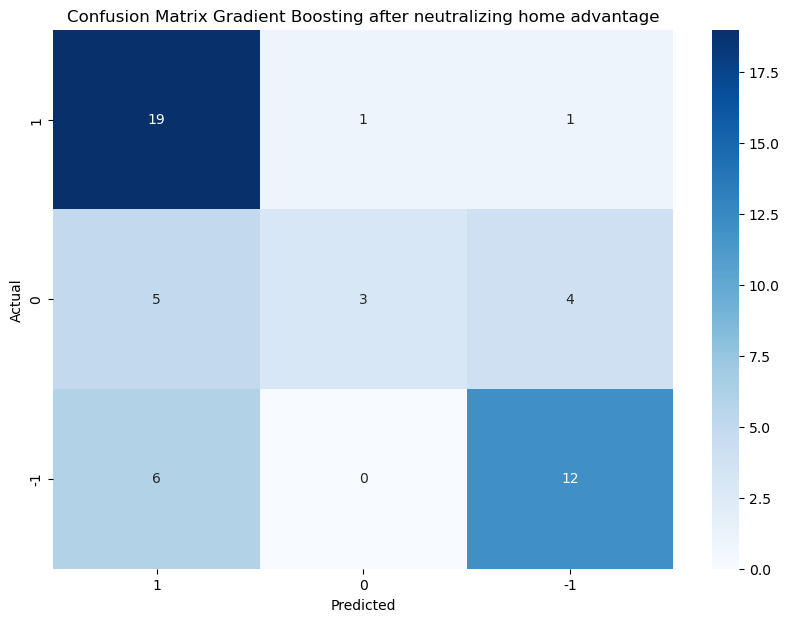

In [180]:
# Generating the confusion matrix
cm_gb = confusion_matrix(combined_df_gb['Numeric_Outcome'], combined_df_gb['Predicted_Outcome'], labels=[1, 0, -1])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_gb, annot=True, fmt='g', cmap='Blues', xticklabels=[1, 0, -1], yticklabels=[1, 0, -1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Gradient Boosting after neutralizing home advantage')
plt.show()

In [181]:
from sklearn.metrics import precision_recall_fscore_support
accuracy1, precision1, recall1, f1_1 = calculate_metrics(combined_df_svm['Numeric_Outcome'], combined_df_svm['Predicted_Outcome'])
macro_avg, weighted_avg = calculate_average_metrics(combined_df_svm['Numeric_Outcome'], combined_df_svm['Predicted_Outcome'])

print("Metrics for Gradient Boosting after Countering Home Advantage Problem:")
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("F1 Score:", f1_1)
print("Macro Average (Precision, Recall, F1):", macro_avg)
print("Weighted Average (Precision, Recall, F1):", weighted_avg)

Metrics for Gradient Boosting after Countering Home Advantage Problem:
Accuracy: 0.6274509803921569
Precision: [0.60606061 0.         0.66666667]
Recall: [0.95238095 0.         0.66666667]
F1 Score: [0.74074074 0.         0.66666667]
Macro Average (Precision, Recall, F1): (0.42424242424242425, 0.5396825396825397, 0.46913580246913583)
Weighted Average (Precision, Recall, F1): (0.48484848484848486, 0.6274509803921569, 0.5403050108932462)


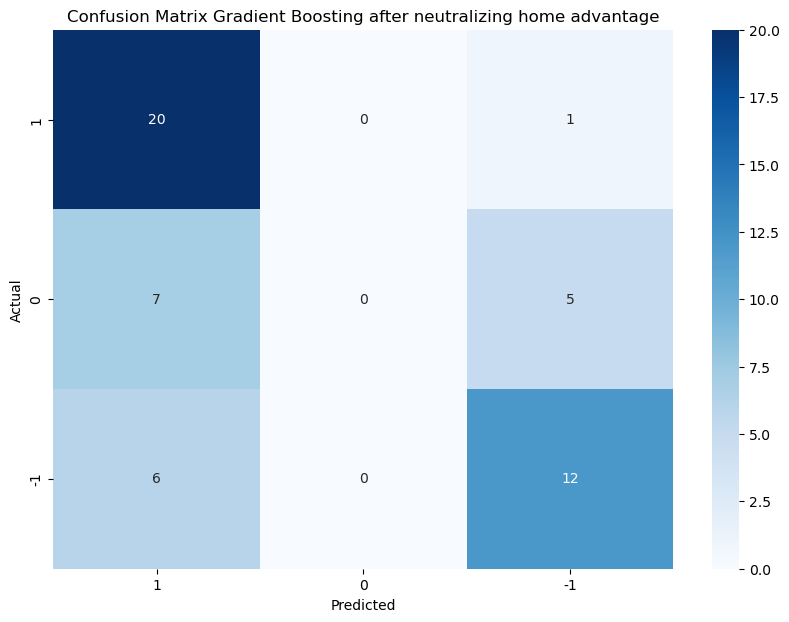

In [182]:
# Generating the confusion matrix
cm_svm = confusion_matrix(combined_df_svm['Numeric_Outcome'], combined_df_svm['Predicted_Outcome'], labels=[1, 0, -1])

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_svm, annot=True, fmt='g', cmap='Blues', xticklabels=[1, 0, -1], yticklabels=[1, 0, -1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Gradient Boosting after neutralizing home advantage')
plt.show()